# Problem overview

## **Context:**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘**Traveldata_train.csv**’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled ‘**Surveydata_train.csv**’.

In the survey, **each passenger was explicitly asked whether they were satisfied with their overall travel experience** or not, and that is captured in the data of the survey report under the variable labeled ‘Overall_Experience’.

## **Goal:**

The goal of the problem is to **predict whether a passenger was satisfied or not considering his/her overall experience** of traveling on the Shinkansen Bullet Train.

## **Objective:**

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

## **Dataset:**

The problem consists of 2 separate datasets: **Travel data & Survey data**.

* **Travel data** has information related to passengers and attributes related to the Shinkansen train, in which they traveled.

* **Survey data** is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

* Train_Data
* Test_Data

**Target Variable**: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The **training set** can be used to build your machine-learning model. The training set has labels for the target column - **Overall_Experience**.

The **testing set** should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘**Overall_Experience**’ level for each participant.

## **Data Dictionary:**

Here is the information in table format for easier reference:

| Column Name               | Column Description                                | Column Value Examples                    |
|---------------------------|---------------------------------------------------|------------------------------------------|
| ID                        | The unique ID of the passenger                    | Continuous values like 98800001, 98800002, etc. |
| Gender                    | The gender of the passenger                       | "Male", "Female"                         |
| Customer_Type             | Loyalty type of the passenger                     | "Loyal Customer", "Disloyal Customer"    |
| Age                       | The age of the passenger                          | Continuous values like 48, 52, 9, etc.   |
| Type_Travel               | Purpose of travel for the passenger               | "Personal Travel", "Business Travel"     |
| Travel_Class              | The train class that the passenger traveled in    | "Business", "Eco"                        |
| Travel_Distance           | The distance traveled by the passenger            | Continuous values like 272, 780, 853, etc. |
| Departure_Delay_in_Mins   | The delay (in minutes) in train departure         | Continuous values like 9, 15, 13, etc.   |
| Arrival_Delay_in_Mins     | The delay (in minutes) in train arrival           | Continuous values like 0, 15, 18, etc.   |


# Import libs and load data

#### **Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

#### **Load Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path_travel_train = "/content/drive/MyDrive/MIT/10_hackathon/Traveldata_train_(2).csv"
path_survey_train = "/content/drive/MyDrive/MIT/10_hackathon/Surveydata_train_(2).csv"

path_travel_test = "/content/drive/MyDrive/MIT/10_hackathon/Traveldata_test_(2).csv"
path_survey_test = "/content/drive/MyDrive/MIT/10_hackathon/Surveydata_test_(2).csv"

# Read the healthcare dataset file
travel_test = pd.read_csv(path_travel_test)
survey_test = pd.read_csv(path_survey_test)

travel_train = pd.read_csv(path_travel_train)
survey_train = pd.read_csv(path_survey_train)

As we see the data consists of both parts **travel** and **survey** lets combine this parts together

In [6]:
train_df = pd.merge(travel_train, survey_train, on='ID')
test_df = pd.merge(travel_test, survey_test, on='ID')

In [7]:
# Copying data to another variable to avoid any changes to original data
backup_df_train = train_df.copy(deep=True)
backup_df_test = test_df.copy(deep=True)

In [8]:
train_df = backup_df_train
test_df = backup_df_test

#### **Data Overview**

In [ ]:
# View the first 5 rows of the dataset
train_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
test_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
# Understand the shape of the data
print(f"survey train shape: {train_df.shape}")
print(f"survey test shape: {test_df.shape}")

survey train shape: (94379, 25)
survey test shape: (35602, 24)


- **Survey train has one column more then test** - "Overall_Experience" column missing

-  training dataset consists of 94,379 samples and 25 features, while the test dataset consists of 35,602 samples and 24 features.

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

### Dataset Information

The training and test datasets have the following shapes and details:

#### Survey Train Shape: (94379, 25)
- **Columns**: 25
- **Non-null counts**: Most columns have slight variations in non-null counts, indicating some missing values.

#### Survey Test Shape: (35602, 24)
- **Columns**: 24
- **Non-null counts**: Similar slight variations in non-null counts, indicating missing values.

Key differences:
- The train dataset includes an additional column, `Overall_Experience`, not present in the test dataset.

### Summary

The datasets include a mix of continuous and categorical data, with slight variations in non-null counts across both datasets. The training dataset has an extra feature, which may be the target variable.

In [ ]:
test_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,35602.0,NaN,NaN,NaN,99917801.5,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Gender,35572,2,Female,18069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,32219,2,Loyal Customer,26349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,35591.0,NaN,NaN,NaN,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Type_Travel,32154,2,Business Travel,22313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,35602,2,Eco,18473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,35602.0,NaN,NaN,NaN,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,NaN,NaN,NaN,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,NaN,NaN,NaN,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0
Seat_Comfort,35580,6,Acceptable,8003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Insights from the Test DataFrame:

- **ID**: Unique identifier with values ranging from 99900001 to 99935602.
- **Gender**: Mostly "Female" with 18,069 instances; 30 missing values.
- **Customer_Type**: Predominantly "Loyal Customer" (26,349 instances); 8,951 missing values.
- **Age**: Average age is 39.45 with a standard deviation of 15.14, ranging from 7 to 85; 33 missing values.
- **Type_Travel**: Mostly "Business Travel" (22,313 instances); 9,226 missing values.
- **Travel_Class**: Majority in "Eco" class (18,473 instances).
- **Travel_Distance**: Average distance is 1987.15 km with a wide range (50 to 6868 km).
- **Departure_Delay_in_Mins**: Mostly no delays, but significant variation with some delays up to 978 minutes; 57 missing values.
- **Arrival_Delay_in_Mins**: Similar pattern to departure delays, with some delays up to 970 minutes; 357 missing values.
- **Seat_Comfort**: Most frequent value is "Acceptable" (8,003 instances); 61 missing values.
- **Seat_Class**: Mostly "Ordinary" (17,860 instances).
- **Arrival_Time_Convenient**: Most frequent value is "Good" (7,361 instances); 8,930 missing values.
- **Catering**: Most frequent value is "Acceptable" (7,133 instances); 8,741 missing values.
- **Platform_Location**: Most frequent value is "Manageable" (9,364 instances); 30 missing values.
- **Onboard_Wifi_Service**: Most frequent value is "Good" (8,743 instances); 30 missing values.
- **Onboard_Entertainment**: Most frequent value is "Good" (11,436 instances); 18 missing values.
- **Online_Support**: Most frequent value is "Good" (11,487 instances); 91 missing values.
- **Ease_of_Online_Booking**: Most frequent value is "Good" (11,025 instances); 73 missing values.
- **Onboard_Service**: Most frequent value is "Good" (10,222 instances); 7,601 missing values.
- **Legroom**: Most frequent value is "Good" (10,842 instances); 90 missing values.
- **Baggage_Handling**: Most frequent value is "Good" (13,291 instances); 142 missing values.
- **CheckIn_Service**: Most frequent value is "Good" (9,982 instances); 77 missing values.
- **Cleanliness**: Most frequent value is "Good" (13,421 instances); 6 missing values.
- **Online_Boarding**: Most frequent value is "Good" (9,680 instances); 6 missing values.

### Summary:

The test dataset features a mix of categorical and continuous variables, with notable missing values in several columns, especially `Customer_Type`, `Type_Travel`, `Arrival_Time_Convenient`, `Catering`, and `Onboard_Service`. Categorical variables often have the majority class as "Good" or "Acceptable," while continuous variables like age and travel distance show reasonable means and wide ranges. Addressing these missing values and understanding the distribution of data is crucial for accurate model training and predictions.

In [ ]:
train_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


### Insights from the Train DataFrame:

- **ID**: Unique identifier with values ranging from 98800001 to 98894379.
- **Gender**: Mostly "Female" with 47,815 instances; 77 missing values.
- **Customer_Type**: Predominantly "Loyal Customer" (69,823 instances); 8,951 missing values.
- **Age**: Average age is 39.42 with a standard deviation of 15.12, ranging from 7 to 85; 33 missing values.
- **Type_Travel**: Mostly "Business Travel" (58,617 instances); 9,226 missing values.
- **Travel_Class**: Majority in "Eco" class (49,342 instances).
- **Travel_Distance**: Average distance is 1978.89 km with a wide range (50 to 6951 km).
- **Departure_Delay_in_Mins**: Mostly no delays, but significant variation with some delays up to 1592 minutes.
- **Arrival_Delay_in_Mins**: Similar pattern to departure delays, with some delays up to 1584 minutes.
- **Overall_Experience**: Binary variable with values 0 and 1, mean value 0.55, indicating slightly more positive experiences.
- **Seat_Comfort**: Most frequent value is "Acceptable" (21,158 instances); 61 missing values.
- **Seat_Class**: Mostly "Green Car" (47,435 instances).
- **Arrival_Time_Convenient**: Most frequent value is "Good" (19,574 instances); 8,930 missing values.
- **Catering**: Most frequent value is "Acceptable" (18,468 instances); 8,741 missing values.
- **Platform_Location**: Most frequent value is "Manageable" (24,173 instances); 30 missing values.
- **Onboard_Wifi_Service**: Most frequent value is "Good" (22,835 instances); 30 missing values.
- **Onboard_Entertainment**: Most frequent value is "Good" (30,446 instances); 18 missing values.
- **Online_Support**: Most frequent value is "Good" (30,016 instances); 91 missing values.
- **Ease_of_Online_Booking**: Most frequent value is "Good" (28,909 instances); 73 missing values.
- **Onboard_Service**: Most frequent value is "Good" (27,265 instances); 7,601 missing values.
- **Legroom**: Most frequent value is "Good" (28,870 instances); 90 missing values.
- **Baggage_Handling**: Most frequent value is "Good" (34,944 instances); 142 missing values.
- **CheckIn_Service**: Most frequent value is "Good" (26,502 instances); 77 missing values.
- **Cleanliness**: Most frequent value is "Good" (35,427 instances); 6 missing values.
- **Online_Boarding**: Most frequent value is "Good" (25,533 instances); 6 missing values.

### Summary:

The datasets have a mix of categorical and continuous variables, with some columns having significant missing values. Addressing these missing values will be crucial for accurate model training and predictions. Key categorical variables often have the majority class as "Good" or "Acceptable," while continuous variables like age and travel distance show reasonable means and wide ranges.

In [ ]:
test_df.duplicated().sum(), train_df.duplicated().sum()

(0, 0)

# Handle missing values

* missing values counts in test and train

# **Data Prep.**

In [ ]:
train_df.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
test_df.isnull().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

Missing values percentage counts in test and train. Let's define a function that will print the percentage of a missing values

In [9]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
def cout_missing(data):
  return pd.DataFrame({
      'Count':data.isnull().sum()[data.isnull().sum()>0],
      'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])
      *100})

In [10]:
cout_missing(train_df)

,Count,Percentage
Gender,77,0.081586
Customer_Type,8951,9.484101
Age,33,0.034965
Type_Travel,9226,9.775480
Departure_Delay_in_Mins,57,0.060395
Arrival_Delay_in_Mins,357,0.378262
Seat_Comfort,61,0.064633
Arrival_Time_Convenient,8930,9.461851
Catering,8741,9.261594
Platform_Location,30,0.031787


Lats take a closer look on a missing data

1. **Cleanliness and Online_Boarding**: These features have very low missing percentages (0.006%) and might be safe to drop if their absence won't significantly impact analysis.

2. **Seat_Comfort, Departure_Delay_in_Mins, Legroom, Platform_Location, Onboard_Wifi_Service, Onboard_Entertainment**: These features have missing percentages around 0.06% to 0.09%. Unless these features are critical to  analysis, dropping these rows might not significantly impact dataset.

3. **Gender, Age, and CheckIn_Service**: These features have missing percentages around 0.08% to 0.09%. Gender and Age are demographic variables that might be important depending on the analysis context. CheckIn_Service might be less critical depending on the specific analysis needs.

4. **Customer_Type, Type_Travel, Arrival_Time_Convenient, Catering, Online_Support, Ease_of_Online_Booking, Onboard_Service, Baggage_Handling**: These features have missing percentages around 9% to 9.78%. These are relatively higher percentages, suggesting a more substantial portion of data might be missing for these features. Consider imputing these missing values if these features are crucial for analysis, or evaluate if dropping rows with missing values significantly affects dataset's integrity.

Always ensure to assess the impact of dropping or imputing values based on the context of analysis and the importance of each feature to objectives.

* Let's **drop the missing values with less then 1%** representation
* The **Age** parameter is not dropped since it's a numerical column and we wolud like to **replace it with K nearest neibours** most close walues

In [11]:
# Drop categor records with less then 1%
train_df.dropna(subset=['Cleanliness'], inplace=True)
train_df.dropna(subset=['Gender'], inplace=True)
train_df.dropna(subset=['Seat_Comfort'], inplace=True)
train_df.dropna(subset=['Platform_Location'], inplace=True)
train_df.dropna(subset=['Onboard_Wifi_Service'], inplace=True)
train_df.dropna(subset=['Onboard_Entertainment'], inplace=True)
train_df.dropna(subset=['Ease_of_Online_Booking'], inplace=True)
train_df.dropna(subset=['CheckIn_Service'], inplace=True)
# train_df.dropna(subset=['Age'], inplace=True)
train_df.dropna(subset=['Legroom'], inplace=True)

In [12]:
cout_missing(train_df)

,Count,Percentage
Customer_Type,8853,9.412578
Age,33,0.035086
Type_Travel,9195,9.776195
Departure_Delay_in_Mins,27,0.028707
Arrival_Delay_in_Mins,327,0.347669
Arrival_Time_Convenient,8821,9.378555
Catering,8699,9.248844
Onboard_Service,7497,7.970868


Lets define categorical and numerical coumns

In [13]:
categorical_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']
numerical_cols = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

Let's replace categorical missing values with '**Unknown**' for now

In [14]:
# Fill missing values for categorical columns with 'Unknown'
train_df[categorical_cols] = train_df[categorical_cols].fillna('Unknown')
test_df[categorical_cols] = test_df[categorical_cols].fillna('Unknown')

In [15]:
cout_missing(train_df)

,Count,Percentage
Age,33,0.035086
Departure_Delay_in_Mins,27,0.028707
Arrival_Delay_in_Mins,327,0.347669


Now let's handle the **continious missing values**. Let's utilize **KNNImputer** for this porpouse

Note:
- The `KNNImputer` is particularly useful when you have structured **data where missing values can be reasonably estimated based on the values of other features**. It assumes a numeric distance metric for the features and operates on numerical data.

KNNImputer:
- **Purpose**: It is used for imputing missing values in datasets using the k-Nearest Neighbors approach.
- **Functionality**:
  - It treats each feature with missing values as a target variable and uses other features to predict the missing values.
  - For each missing value, it finds the k-nearest neighbors with known values and averages (or uses another aggregation method) those values to impute the missing value.
  - The number of neighbors (`n_neighbors`) parameter (`n_neighbors=10` in my case) specifies how many neighbors to consider when imputing each missing value.



In [16]:
from sklearn.impute import KNNImputer
# Initialize KNNImputer with desired parameters (e.g., number of neighbors)
imputer = KNNImputer(n_neighbors=10)

# Impute missing values in numerical columns
train_df[numerical_cols] = imputer.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = imputer.fit_transform(test_df[numerical_cols])

In [17]:
cout_missing(train_df)

,Count,Percentage


We now see that there are no missing values as we handled them all.

### Encoding

**Encode Categorical range columns**

**Note**:

In my case, **duplicating the dataset before each manipulation** proved highly beneficial. This approach allows me to begin from any necessary step and conduct experiments without needing to repeat all preprocessing procedures from the beginning. Moreover, it mitigates concerns about inadvertently compromising the dataset during the process.

In [18]:
train_dataframe_encoded = train_df.copy(deep=True)
test_dataframe_encoded = test_df.copy(deep=True)

Let's proceed with **encoding** our **categorical values** using a predefined mapping strategy. The mapping dictionary `mapping` aligns specific qualitative assessments from **'Extremely Poor' to 'Excellent'** with numerical values **ranging from 0 to 5**. This systematic approach ensures that each categorical value is assigned a corresponding numeric representation based on its **ordinal position**.

Additionally, we have included a handling for '**Unknown**' values within the mapping, setting them to `None`. This ensures that any unforeseen or **undefined entries are appropriately addressed** during the encoding process, maintaining clarity and consistency in our dataset transformations.

Here's how this encoding strategy is implemented across the specified columns in both the training (`train_dataframe_encoded`) and test (`test_dataframe_encoded`) datasets.

Define encoding function

In [ ]:
# Define mapping based on the specified order
mapping = {
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable': 3,
    'Good': 4,
    'Excellent': 5,
    'Unknown': None  # Handle unknown values if needed
}

columns = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

for col in columns:
    train_dataframe_encoded[col] = train_dataframe_encoded[col].map(mapping)
    test_dataframe_encoded[col] = test_dataframe_encoded[col].map(mapping)

**Sanity check**: let's print the dataset so we can see that categorical colums **encoded with a values 0 to 5**

In [ ]:
train_dataframe_encoded.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,Unknown,Business,272,0.0,5.0,0,2.0,Green Car,5.0,5.0,NaN,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,1.0,Ordinary,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,2.0,Green Car,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,3.0,Ordinary,2.0,NaN,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,3.0,Ordinary,3.0,3.0,NaN,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


For each column in the list, it replaces any "**Unknown**" values to the **mode** most common value in that column. This helps make sure the data is clear and ready for analysis or other uses without confusing unknown entries.

* Idea: can we do something similar to KNNimputer but for categorical colums?

In [ ]:
def replace_unknown_with_mode(df, columns):
    df_replaced = df.copy()

    for col in columns:
        if col in df_replaced.columns:
            # Replace "Unknown" with NaN first to properly calculate mode
            df_replaced[col].replace('Unknown', np.nan, inplace=True)

            # Compute the mode value of the column, ignoring NaN
            mode_value = df_replaced[col].mode(dropna=True)[0]

            # Replace NaN values with the mode value
            df_replaced[col].fillna(mode_value, inplace=True)

    return df_replaced

In [ ]:
cout_missing(train_dataframe_encoded)

,Count,Percentage
Arrival_Time_Convenient,8821,9.378555
Catering,8699,9.248844
Platform_Location,76278,81.099357
Onboard_Service,7497,7.970868


In [ ]:
columns = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

train_dataframe_encoded = replace_unknown_with_mode(train_dataframe_encoded, columns)
test_dataframe_encoded = replace_unknown_with_mode(test_dataframe_encoded, columns)

In [ ]:
cout_missing(train_dataframe_encoded)

,Count,Percentage


**Encode Categorical non-range columns**

Let's now encode categorical columns that are not in specific range, like Gender etc. Also replace Unknown values with Mode as we did before.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def encode_categorical_columns(df, categorical_columns, unknown_value='Unknown', unknown_map=-1):
    df_encoded = df.copy()
    encoder = OneHotEncoder(sparse=False, drop='first')

    for col in categorical_columns:
        if col in df.columns:
            # Convert the column to string to handle mixed data types
            df_encoded[col] = df_encoded[col].astype(str)

            # Check if column contains the unknown value
            if unknown_value in df_encoded[col].values:
                # Map unknown value to unknown_map (-1)
                df_encoded[col] = df_encoded[col].replace(unknown_value, str(unknown_map))

                # One-Hot Encoding with unknown value handled
                encoded_cols = pd.DataFrame(encoder.fit_transform(df_encoded[[col]]), columns=encoder.get_feature_names_out([col]))
            else:
                # One-Hot Encoding without unknown value
                encoded_cols = pd.DataFrame(encoder.fit_transform(df[[col]]), columns=encoder.get_feature_names_out([col]))

            df_encoded = pd.concat([df_encoded.reset_index(drop=True), encoded_cols], axis=1)
            df_encoded.drop(col, axis=1, inplace=True)  # Drop the original categorical column

    return df_encoded

In [ ]:
columns = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']
train_dataframe_encoded = encode_categorical_columns(train_dataframe_encoded, columns)
test_dataframe_encoded = encode_categorical_columns(test_dataframe_encoded, columns)


In [ ]:
def replace_unknown_with_mode(df):
    df_replaced = df.copy()

    for col in df.columns:
        if col in df_replaced.columns:
            # Replace "Unknown" with NaN first to properly calculate mode
            df_replaced[col].replace('Unknown', np.nan, inplace=True)

            # Compute the mode value of the column, ignoring NaN
            mode_value = df_replaced[col].mode(dropna=True)[0]

            # Replace NaN values with the mode value
            df_replaced[col].fillna(mode_value, inplace=True)

    return df_replaced


In [ ]:
train_dataframe_encoded = replace_unknown_with_mode(train_dataframe_encoded)
test_dataframe_encoded = replace_unknown_with_mode(test_dataframe_encoded)

In [ ]:
train_dataframe_encoded.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,98800001,52.0,272,0.0,5.0,0,2.0,5.0,5.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,98800002,48.0,2200,9.0,0.0,0,1.0,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,98800003,43.0,1061,77.0,119.0,1,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,98800004,44.0,780,13.0,18.0,0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,98800005,50.0,1981,0.0,0.0,1,3.0,3.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
train_dataframe_encoded.columns

Index(['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins', 'Overall_Experience', 'Seat_Comfort',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender_Male', 'Customer_Type_Disloyal Customer',
       'Customer_Type_Loyal Customer', 'Type_Travel_Business Travel',
       'Type_Travel_Personal Travel', 'Travel_Class_Eco',
       'Seat_Class_Ordinary'],
      dtype='object')

In [ ]:
cout_missing(train_dataframe_encoded)

,Count,Percentage


**Sanity check:** we can see that all the categorical columns are encoded.

Example: now we have columns like 'Gender_Male' with values 1.0 and 0.0

## Featureengeneer

In [ ]:
test_df_features = test_dataframe_encoded.copy(deep=True)
train_df_features = train_dataframe_encoded.copy(deep=True)

In [ ]:
train_df_features.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,98800001,52.0,272,0.0,5.0,0,2.0,5.0,5.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,98800002,48.0,2200,9.0,0.0,0,1.0,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,98800003,43.0,1061,77.0,119.0,1,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,98800004,44.0,780,13.0,18.0,0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,98800005,50.0,1981,0.0,0.0,1,3.0,3.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
train_df_features.columns

Index(['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins', 'Overall_Experience', 'Seat_Comfort',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender_Male', 'Customer_Type_Disloyal Customer',
       'Customer_Type_Loyal Customer', 'Type_Travel_Business Travel',
       'Type_Travel_Personal Travel', 'Travel_Class_Eco',
       'Seat_Class_Ordinary'],
      dtype='object')

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


Explanation of Feature Engineering

Here’s a detailed explanation of each feature and the reasoning behind it:

1. Time-related Features
  - **Total_Delay**: This feature represents the sum of departure and arrival delays. The total delay can significantly impact the passenger's overall satisfaction as longer delays could lead to dissatisfaction.
  - **Average_Delay**: This feature calculates the average of departure and arrival delays. It provides a balanced measure of delay, accounting for both departure and arrival punctuality.

2. Categorical Features
  - **Satisfaction Ratings**: Features like Seat Comfort, Arrival Time Convenience, Catering, Platform Location, Onboard Wi-Fi Service, Onboard Entertainment, Online Support, Ease of Online Booking, Onboard Service, Legroom, Baggage Handling, Check-in Service, Cleanliness, and Online Boarding are converted to numeric values if they aren't already. This conversion ensures that these categorical satisfaction ratings can be used effectively in numerical computations and machine learning models.

3. Numerical Aggregates
  - **Overall_Rating**: This feature is calculated by averaging all the individual satisfaction ratings. It provides a composite score representing the passenger's overall satisfaction across various service aspects.
  - **Avg_Travel_Distance_by_Class**: This feature represents the average travel distance for passengers in each travel class (e.g., Economy). It helps in understanding if travel distance varies significantly by class and how it impacts satisfaction.

4. Interaction Terms
  - **Interaction_Service_Ratings**: This feature represents the interaction between onboard service and check-in service ratings. Interaction terms can capture the combined effect of two or more features, which might be more informative than considering each feature separately.

5. Binary Features
  - **Has_Delay**: This binary feature indicates whether a passenger experienced any delay (either departure or arrival). It's important because the mere presence of a delay, regardless of its duration, can influence overall satisfaction.


In [ ]:
def create_features(df, isTrain):
    # If it's training data, include 'Overall_Experience' directly from the DataFrame
    if isTrain:
        df['Overall_Experience'] = df['Overall_Experience']

    # 1. Time-related Features
    df['Total_Delay'] = df['Departure_Delay_in_Mins'] + df['Arrival_Delay_in_Mins']
    df['Average_Delay'] = (df['Departure_Delay_in_Mins'] + df['Arrival_Delay_in_Mins']) / 2

    # 2. Categorical Features
    satisfaction_columns = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
                            'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                            'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
                            'CheckIn_Service', 'Cleanliness', 'Online_Boarding']



    # Convert categorical columns to numeric if necessary
    for col in satisfaction_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calculate Overall_Rating by averaging satisfaction ratings
    df['Overall_Rating'] = df[satisfaction_columns].mean(axis=1)

    # 3. Numerical Aggregates
    df['Avg_Travel_Distance_by_Class'] = df.groupby('Travel_Class_Eco')['Travel_Distance'].transform('mean')

    # 4. Interaction Terms
    df['Interaction_Service_Ratings'] = df['Onboard_Service'] * df['CheckIn_Service']

    # 6. Binary Features
    df['Has_Delay'] = ((df['Departure_Delay_in_Mins'] > 0) | (df['Arrival_Delay_in_Mins'] > 0)).astype(int)

    return df


In [ ]:
train_df_features.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,98800001,52.0,272,0.0,5.0,0,2.0,5.0,5.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,98800002,48.0,2200,9.0,0.0,0,1.0,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,98800003,43.0,1061,77.0,119.0,1,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,98800004,44.0,780,13.0,18.0,0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,98800005,50.0,1981,0.0,0.0,1,3.0,3.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
test_df_features = create_features(test_df_features, isTrain = False)
train_df_features = create_features(train_df_features, isTrain = True)

**Sanity check:** we now see thet the dataset has new features added to it

Example "Has_Delay" column, etc.

In [ ]:
train_df_features.columns

Index(['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins', 'Overall_Experience', 'Seat_Comfort',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender_Male', 'Customer_Type_Disloyal Customer',
       'Customer_Type_Loyal Customer', 'Type_Travel_Business Travel',
       'Type_Travel_Personal Travel', 'Travel_Class_Eco',
       'Seat_Class_Ordinary', 'Total_Delay', 'Average_Delay', 'Overall_Rating',
       'Avg_Travel_Distance_by_Class', 'Interaction_Service_Ratings',
       'Has_Delay'],
      dtype='object')

## Normalize

In [ ]:
test_df_norm = test_df_features.copy(deep=True)
train_df_norm = train_df_features.copy(deep=True)

Let's **normalize continuous columns** in a DataFrame, ensuring that the data has a mean of 0 and a standard deviation of 1.

Normalization is important for many machine learning algorithms, as it ensures that each feature contributes equally to the result.

In [ ]:
from sklearn.preprocessing import StandardScaler
def normalize_continuous_columns(df, continuous_columns, batch_size=1000):
    df_normalized = df.copy()
    scaler = StandardScaler()

    # Number of rows in the DataFrame
    n_rows = df.shape[0]

    # Normalize in batches
    for start in range(0, n_rows, batch_size):
        # Define the end index for the current batch
        end = min(start + batch_size, n_rows)
        # Get the current batch of continuous columns
        batch = df.loc[start:end-1, continuous_columns]
        # Normalize the current batch
        normalized_batch = scaler.fit_transform(batch)
        # Update the corresponding rows in the normalized DataFrame
        df_normalized.loc[start:end-1, continuous_columns] = normalized_batch

    return df_normalized

In [ ]:
train_df_norm.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary,Total_Delay,Average_Delay,Overall_Rating,Avg_Travel_Distance_by_Class,Interaction_Service_Ratings,Has_Delay
0,98800001,52.0,272,0.0,5.0,0,2.0,5.0,5.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.5,2.785714,2157.266555,8.0,1
1,98800002,48.0,2200,9.0,0.0,0,1.0,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,9.0,4.5,2.857143,1816.293503,10.0,1
2,98800003,43.0,1061,77.0,119.0,1,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,196.0,98.0,3.785714,2157.266555,20.0,1
3,98800004,44.0,780,13.0,18.0,0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,31.0,15.5,2.857143,2157.266555,12.0,1
4,98800005,50.0,1981,0.0,0.0,1,3.0,3.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.571429,2157.266555,16.0,0


Defining **categorical vs continuous** columns

In [ ]:
categorical_columns = ['ID', 'Seat_Comfort',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender_Male', 'Customer_Type_Disloyal Customer',
       'Customer_Type_Loyal Customer', 'Type_Travel_Business Travel',
       'Type_Travel_Personal Travel', 'Travel_Class_Eco',
       'Seat_Class_Ordinary',
       'Has_Delay']

continuous_columns = ['Age','Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins','Total_Delay', 'Average_Delay', 'Overall_Rating','Avg_Travel_Distance_by_Class', 'Interaction_Service_Ratings',]


In [ ]:
train_df_norm = normalize_continuous_columns(train_df_norm, continuous_columns)
test_df_norm = normalize_continuous_columns(test_df_norm, continuous_columns)

**Sanity check:** we can see that columns are now normalized

Example: Travel_Distance (maen = 0, standard deviation = 1)

In [ ]:
train_df_norm.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary,Total_Delay,Average_Delay,Overall_Rating,Avg_Travel_Distance_by_Class,Interaction_Service_Ratings,Has_Delay
0,98800001,0.856473,-1.667109,-0.452959,-0.307239,0,2.0,5.0,5.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.384377,-0.384377,-0.770680,1.032529,-0.633508,1
1,98800002,0.596285,0.223720,-0.160182,-0.464586,0,1.0,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,-0.319468,-0.319468,-0.657909,-0.968496,-0.328937,1
2,98800003,0.271050,-0.893321,2.051914,3.280274,1,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.715029,2.715029,0.808120,1.032529,1.193918,1
3,98800004,0.336097,-1.168903,-0.030058,0.101863,0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.037532,0.037532,-0.657909,1.032529,-0.024366,1
4,98800005,0.726379,0.008942,-0.452959,-0.464586,1,3.0,3.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.465513,-0.465513,0.469806,1.032529,0.584776,0


## EDA

Let's do some basic EDA, (hor hackathone we didn't have much time).

We can see that from the charts below that there are **many outliers**.

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

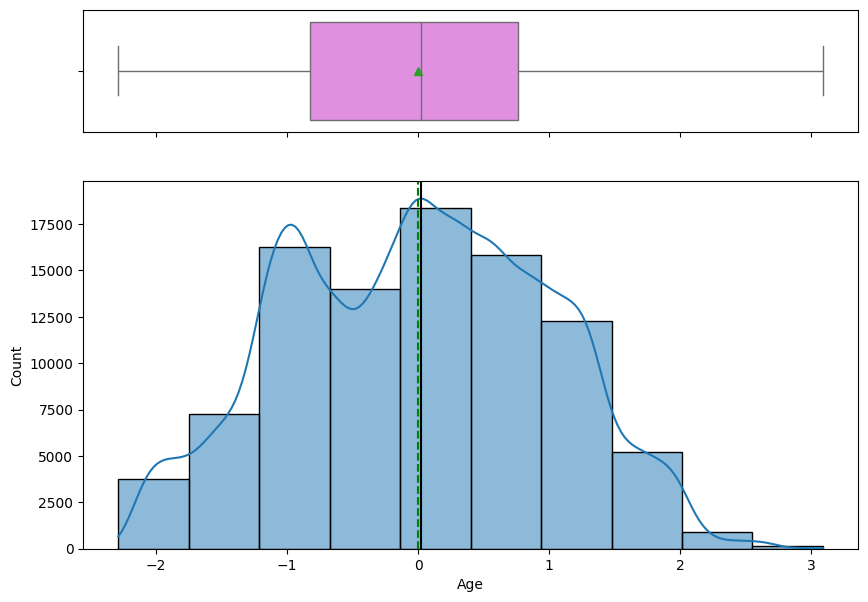

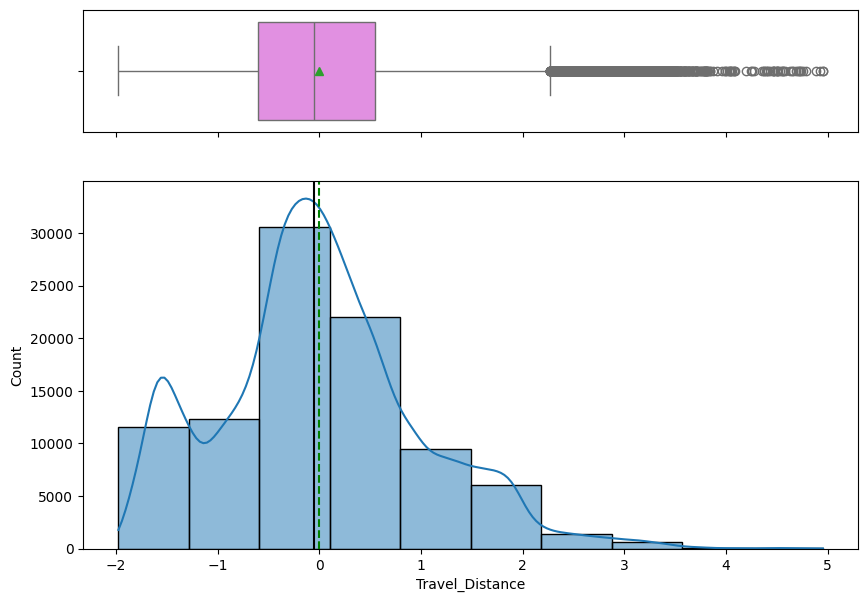

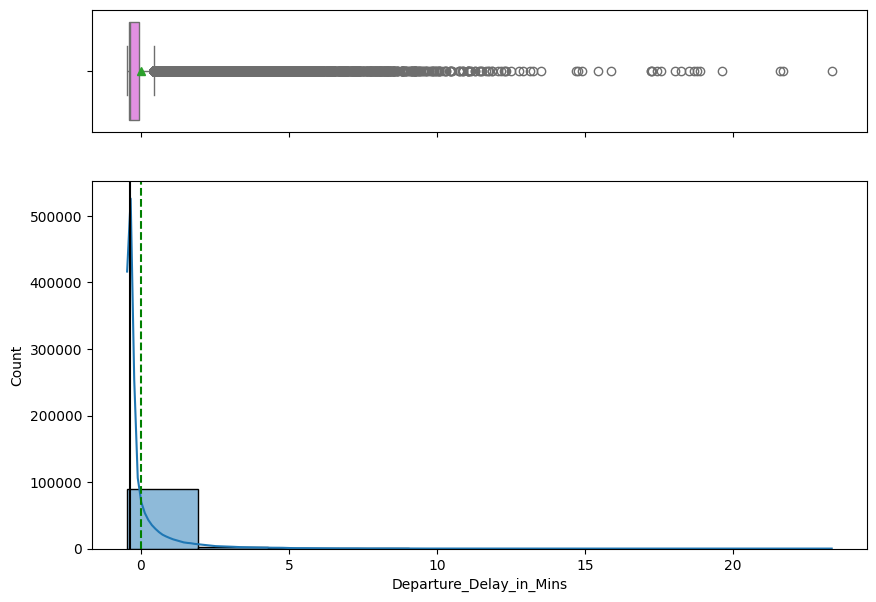

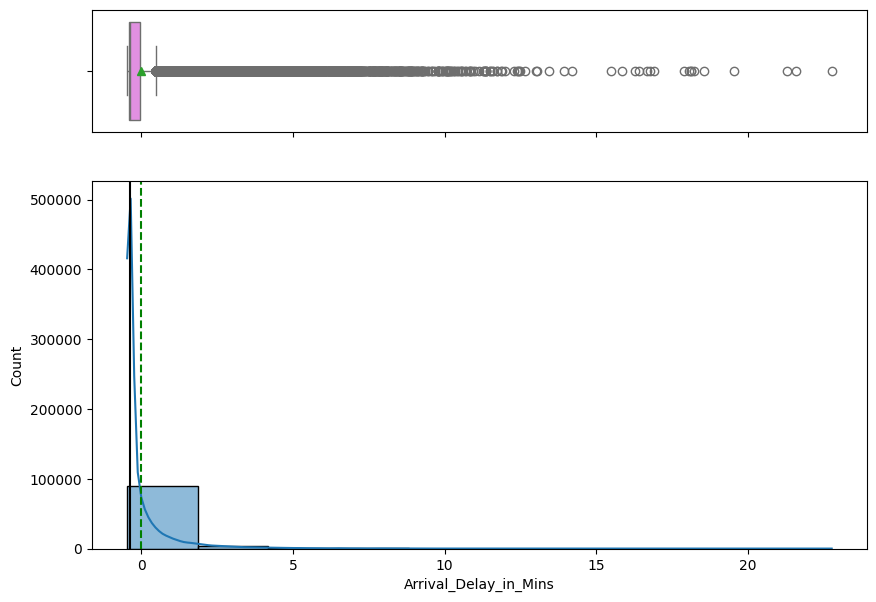

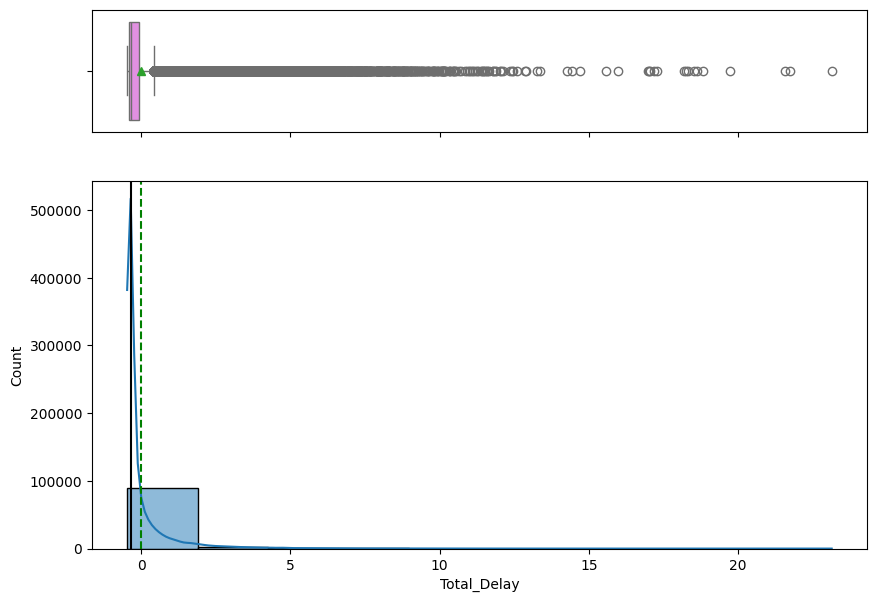

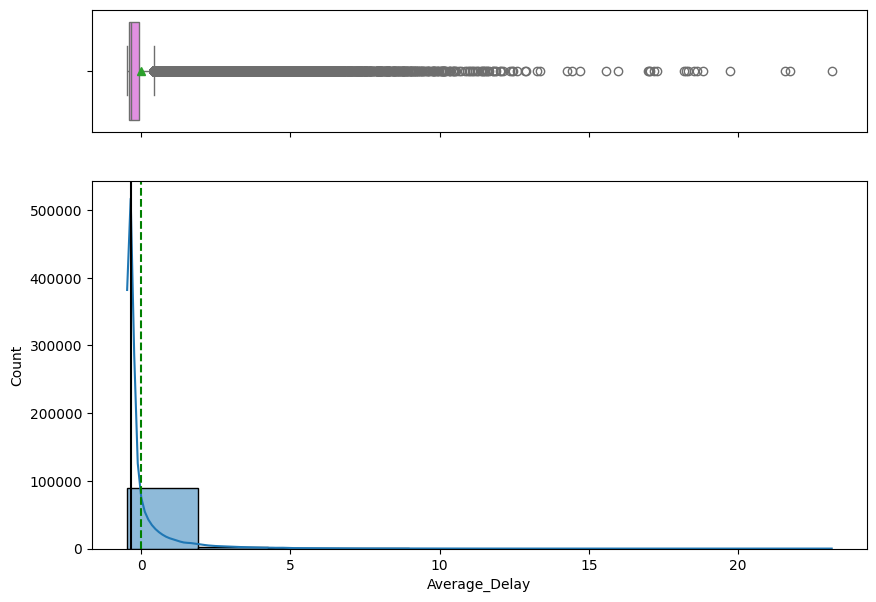

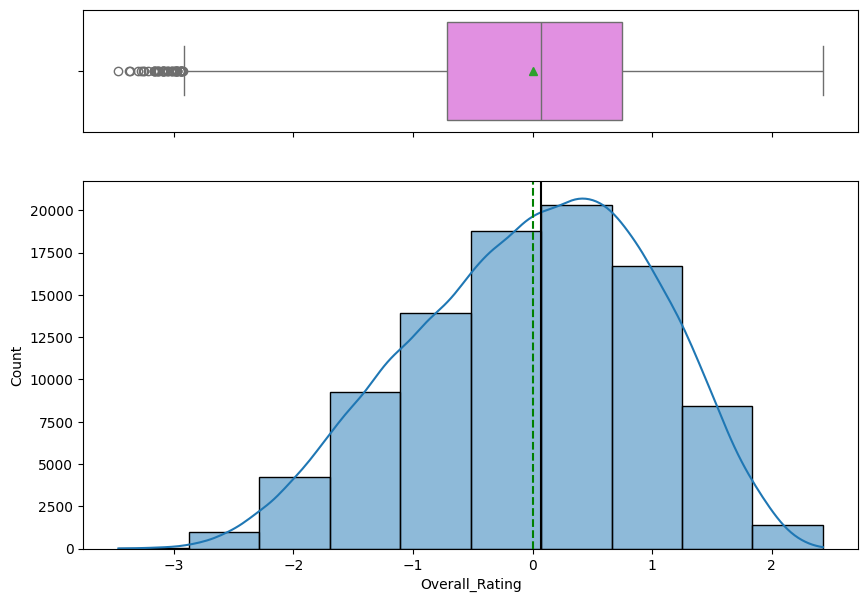

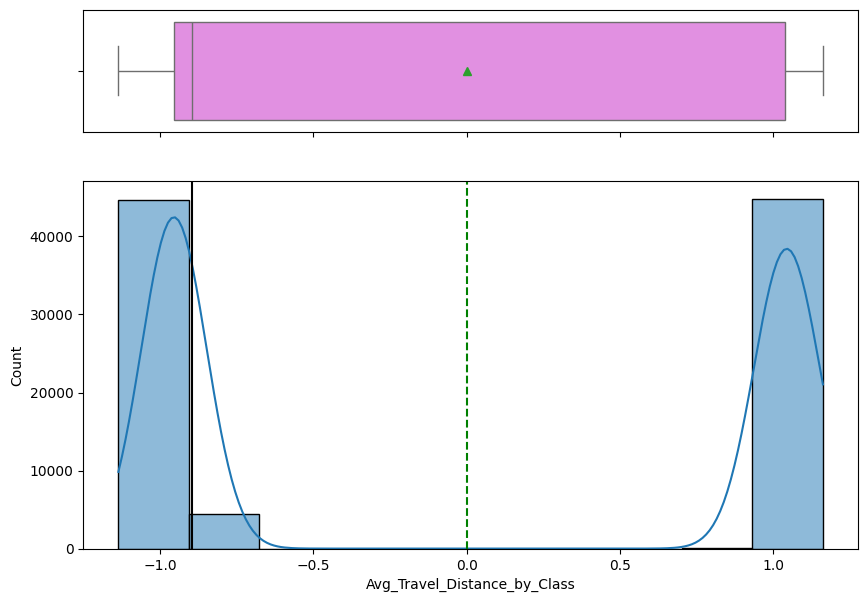

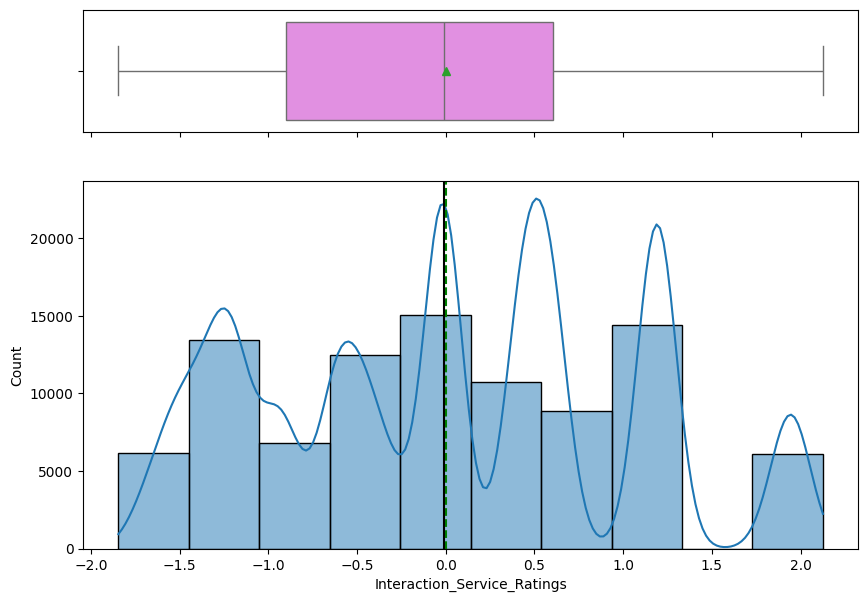

In [ ]:
for col in continuous_columns:
  histogram_boxplot(train_df_norm, col, kde = True, bins = 10)

In [ ]:
def plot_heatmap(df, continuous_columns):
    plt.figure(figsize=(10, 8))
    corr = df[continuous_columns].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Continuous Variables')
    plt.show()

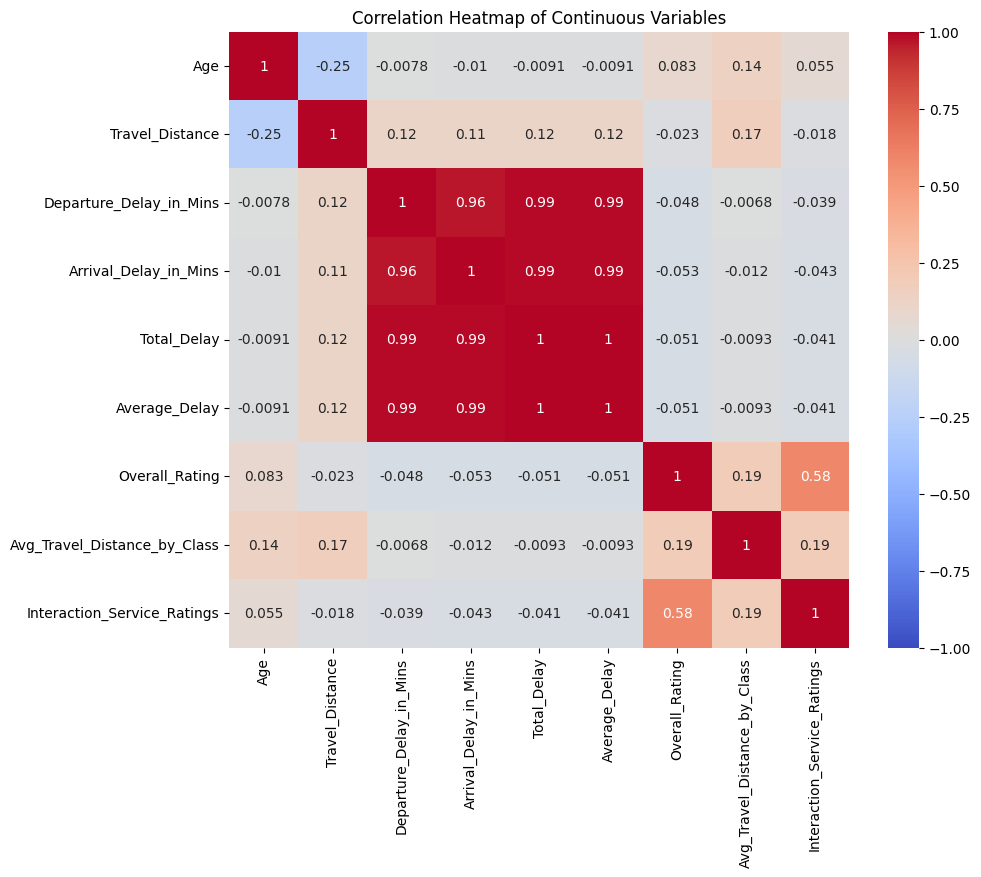

In [ ]:
plot_heatmap(train_df_norm, continuous_columns)

In [ ]:
def plot_pairplot(df, continuous_columns):
    sns.pairplot(df[continuous_columns], corner=True)
    plt.suptitle('Pairplot of Continuous Variables', y=1.02)
    plt.tight_layout()
    plt.show()


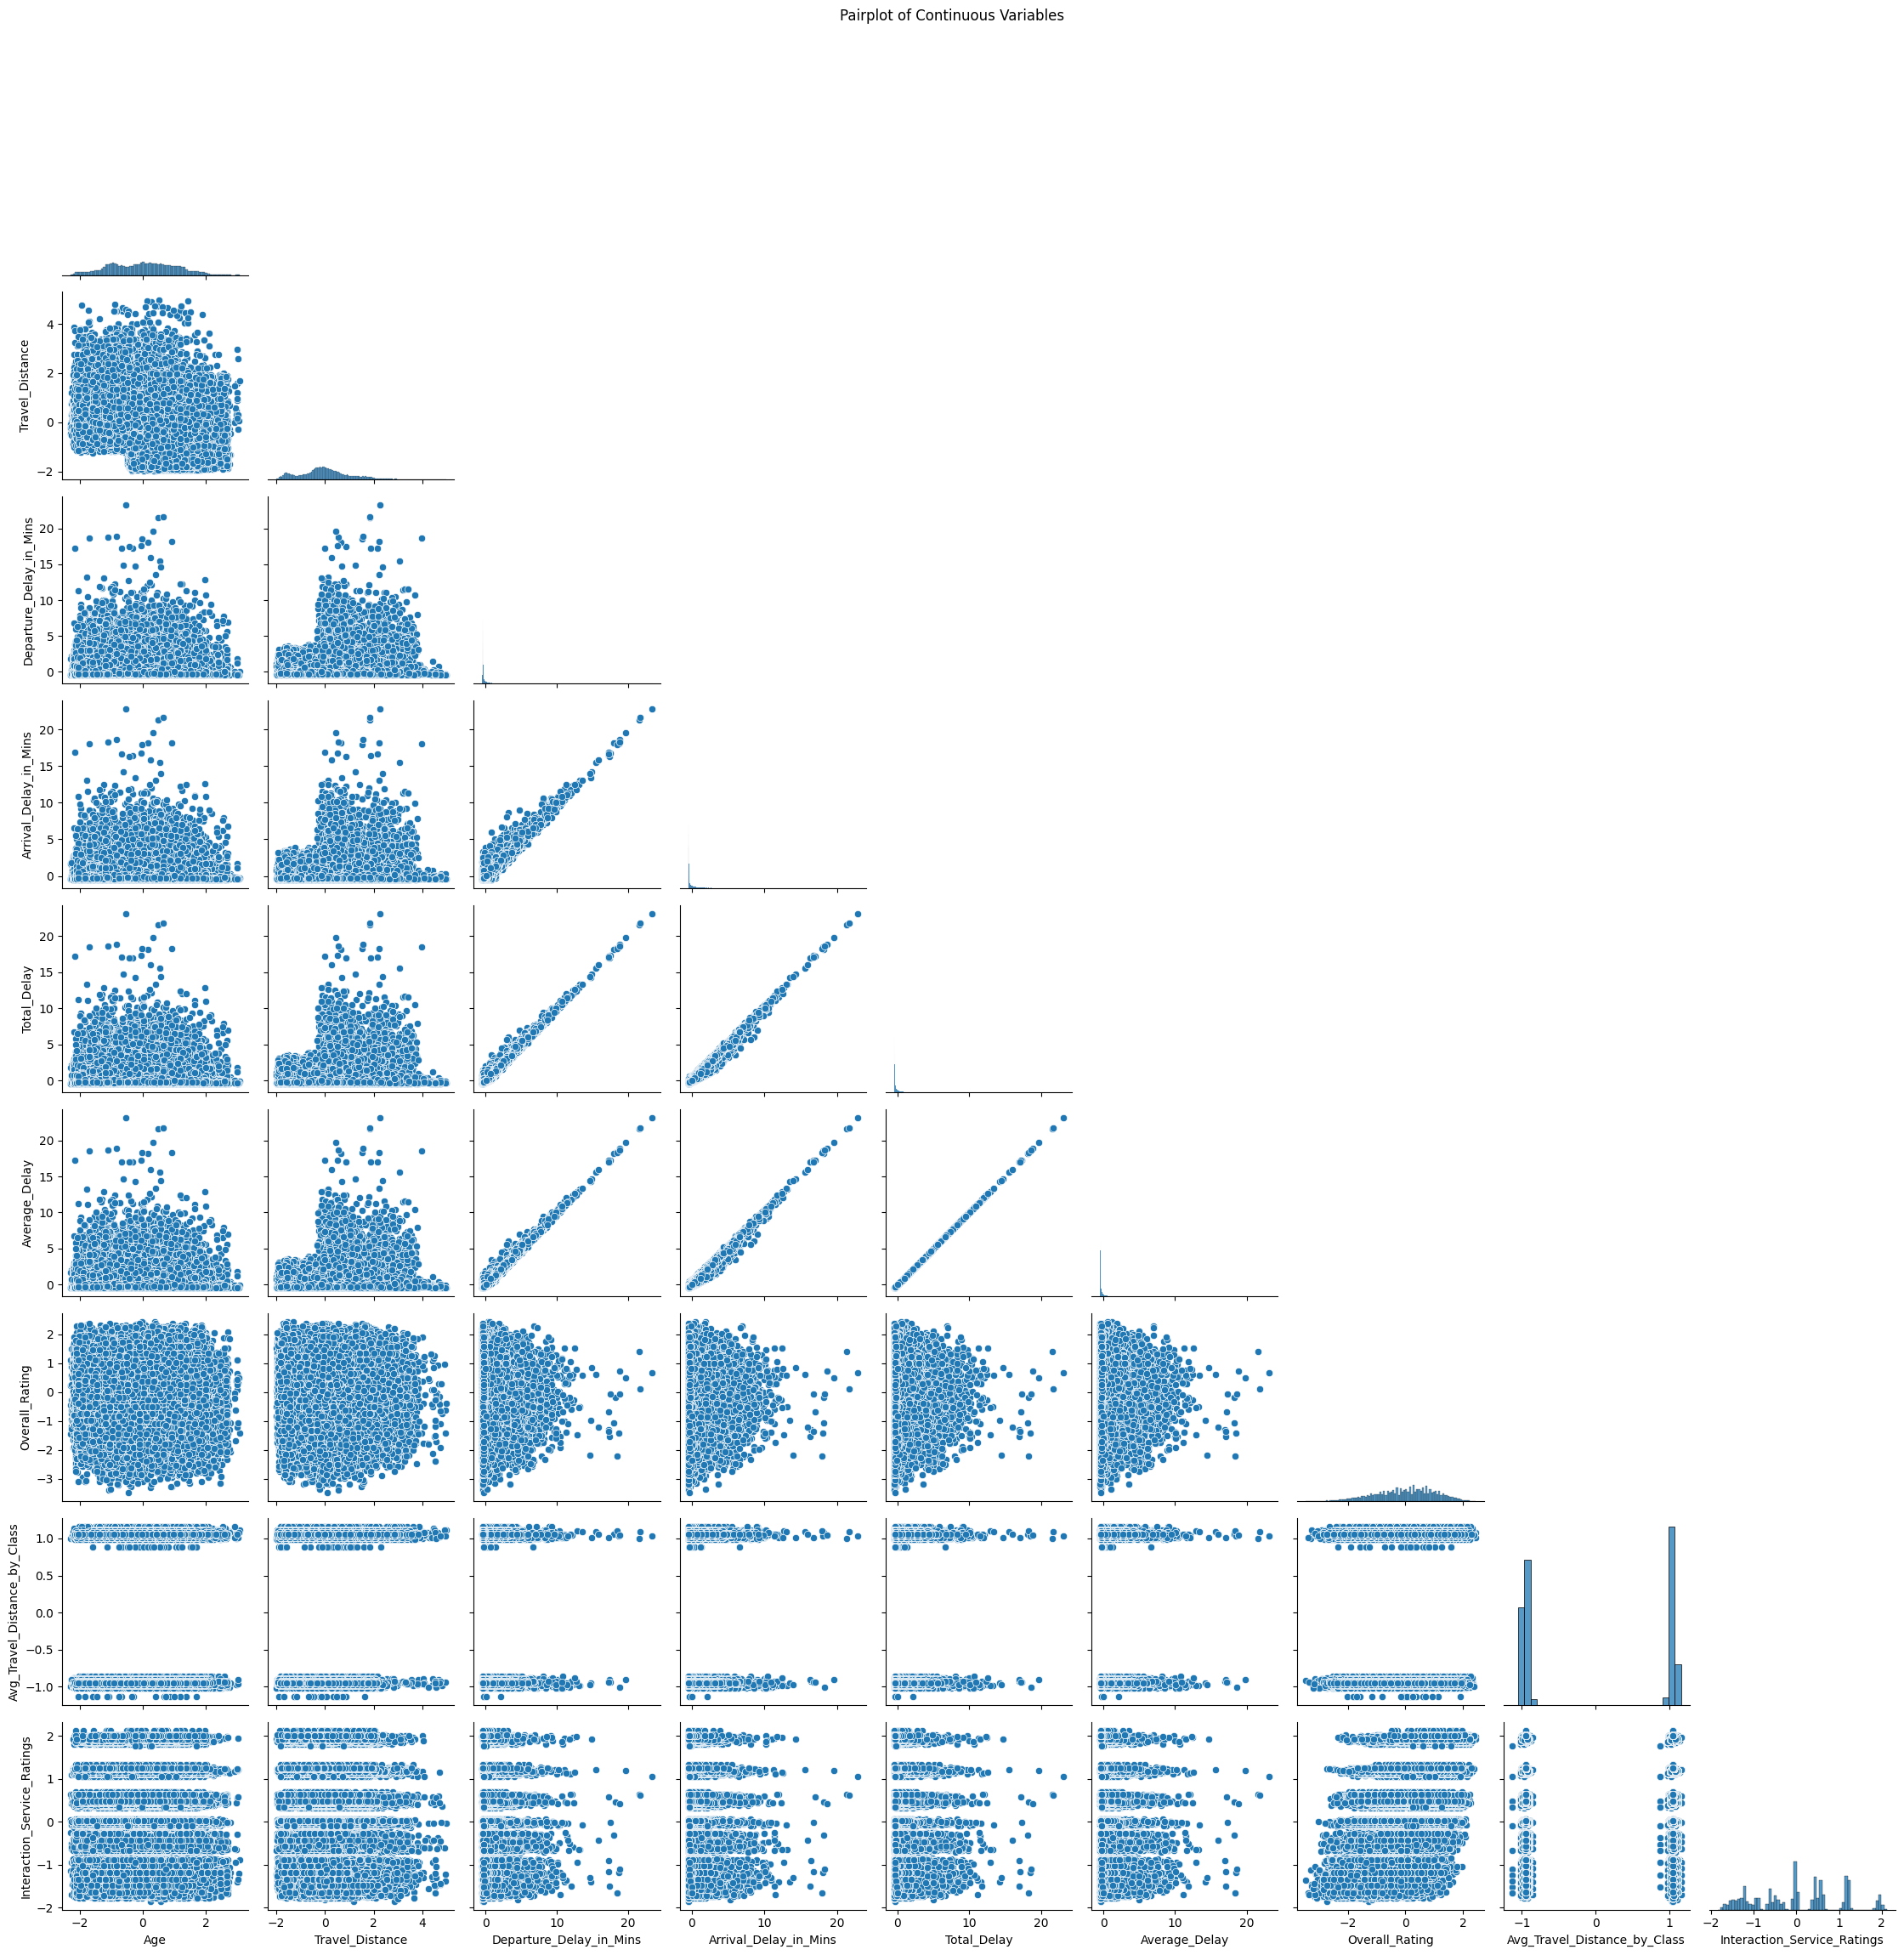

In [ ]:
plot_pairplot(train_df_norm, continuous_columns)

## Outliers

Handling outliers to **reduce impact of outliers in the data**, this will result in better training results.

**Handling Outliers**

Winsorization handles outliers by limiting the maximum value that can be present in the data. Instead of removing outliers, which can result in loss of data, winsorization caps the extreme values. This approach ensures that the dataset retains its size and structure while reducing the disproportionate impact of extreme values.

In [ ]:
train_df_outliers = train_df_norm.copy(deep=True)
test_df_outliers = test_df_norm.copy(deep=True)

The function `winsorize_columns` aims to handle outliers in specified columns of a DataFrame by applying winsorization. Here's a detailed explanation of what it does and how it handles outliers:

**Purpose**

The primary purpose of this function is to reduce the impact of outliers in the data. Outliers can skew the results of statistical analyses and machine learning models, so winsorization helps to mitigate their influence by capping extreme values.

**Steps**

1. **Calculate the Percentile Value**:
   For each specified column, the function calculates the percentile value, which serves as the threshold above which data will be capped. For instance, if the percentile is set to 95, it determines the value below which 95% of the data falls.

2. **Winsorize the Column**:
   The function applies winsorization to the column. This process involves capping the upper values at the specified percentile threshold. If the column has values that exceed the 95th percentile, those values are set to the value at the 95th percentile. This effectively reduces the influence of extreme outliers on the dataset.

3. **Update the DataFrame**:
   The function replaces the original column values with the winsorized values, thus modifying the DataFrame to have capped values for the specified columns.

In summary, `winsorize_columns` reduces the effect of outliers by capping the values in the specified columns at a certain percentile, thereby ensuring that extreme values do not skew the analysis or modeling results.

In [ ]:
from scipy.stats.mstats import winsorize
def winsorize_columns(df, columns_to_winsorize, percentile=95):
    for col in columns_to_winsorize:
        # Calculate the percentile value for the column
        p_value = np.percentile(df[col], percentile)

        # Winsorize the column
        winsorized_values = winsorize(df[col], limits=(None, 1 - percentile / 100.))

        # Replace original column values with winsorized values
        df[col] = winsorized_values

    return df

In [ ]:
train_df_outliers = winsorize_columns(train_df_outliers, continuous_columns)
test_df_outliers = winsorize_columns(test_df_outliers, continuous_columns)

In [ ]:
#train_df_outliers and test_df_outliers are dataframes with 'ID' column
train_df_outliers = train_df_outliers.sort_values(by='ID')
test_df_outliers = test_df_outliers.sort_values(by='ID')

# Reset the index if you want
train_df_outliers.reset_index(drop=True, inplace=True)

## **Data split Test/Train**

Before we proceed to build a model, we'll have to
- **Encode categorical** features.
- **Separate the independent variables** and dependent Variables.
- We'll **split the data** into train and test to be able to evaluate the model that we train on the training data.

In [ ]:
train_data = train_df_outliers.copy(deep=True)
test_data = test_df_outliers.copy(deep=True)

**Split dependant independant variables**

* Dependant - Overall_Experience (what we are trying to predict)

* Independant - All the rest of the columns

In [ ]:
# Separating independent variables and the target variable
x = train_data.drop(['ID','Overall_Experience'],axis=1)
y = train_data['Overall_Experience']

**Split to train and test dataset**

* Test 20% Train 80% (we can play with it an see if we get better results)
* Stratufy=y - so test and train will have same class representation

In [ ]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, stratify=y, random_state=42)

In [ ]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (75244, 31)
Shape of test set :  (18811, 31)


# **Data Prep. CatBoost**

Let's preprocess data for CatBoost

CatBoost (Categorical Boosting) is an advanced gradient boosting library designed to **handle categorical features efficiently** and to provide high-quality predictions. It is developed by **Yandex** and is known for its **performance and ease** of use in various machine learning tasks.

In [23]:
train_dataframe_encoded = train_df.copy(deep=True)
test_dataframe_encoded = test_df.copy(deep=True)

## Handle Unknown values

* **Encoding** - can skip this step, **CatBoost knows to handle categorical variables as is**
* Handle Unknown values

In [24]:
train_dataframe_encoded.head(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,Unknown,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,Unknown,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [25]:
def replace_unknown_with_mode(df, columns):
    df_replaced = df.copy()

    for col in columns:
        if col in df_replaced.columns:
            # Replace "Unknown" with NaN first to properly calculate mode
            df_replaced[col].replace('Unknown', np.nan, inplace=True)

            # Compute the mode value of the column, ignoring NaN
            mode_value = df_replaced[col].mode(dropna=True)[0]

            # Replace NaN values with the mode value
            df_replaced[col].fillna(mode_value, inplace=True)

    return df_replaced

In [28]:
columns = ['Type_Travel','Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

train_dataframe_encoded = replace_unknown_with_mode(train_dataframe_encoded, columns)
test_dataframe_encoded = replace_unknown_with_mode(test_dataframe_encoded, columns)

**Sanity check:** to make sure the "Unknown" values have been replaced

In [34]:
train_dataframe_encoded.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


## Featureengeneer

In [35]:
test_df_features = test_dataframe_encoded.copy(deep=True)
train_df_features = train_dataframe_encoded.copy(deep=True)

**Feature Engineering Overview**

Feature engineering is a crucial step in preparing data for machine learning models. It involves creating new features or modifying existing ones to improve the performance of the model. H

The feature engineering process enhances the dataset by creating new features that capture important aspects of passenger experience, such as delays, satisfaction ratings, and boarding experiences. These engineered features provide more detailed and relevant information for the machine learning model, potentially improving its performance and predictive accuracy.

ere's a breakdown of the feature engineering process described:

1. **Target Variable Handling**:
   - For training data, the target variable 'Overall_Experience' is included directly from the DataFrame, ensuring it is available for model training.

2. **Delay Features**:
   - **Total_Delay**: This feature sums the departure and arrival delays to capture the overall delay experienced by passengers.
   - **Average_Delay**: This feature calculates the average of departure and arrival delays, providing a measure of typical delay experience.

3. **Satisfaction Ratings**:
   - **Overall_Rating**: This feature is derived from several satisfaction ratings columns. By replacing 'Unknown' with NaN and calculating the mode (most frequent value) across these columns, it provides a single aggregate rating of passenger satisfaction.

4. **Travel Distance by Class**:
   - **Avg_Travel_Distance_by_Class**: This feature calculates the average travel distance for each travel class. It helps to understand if different classes have different average travel distances.

5. **Service Interaction Ratings**:
   - **Interaction_Service_Ratings**: This feature combines ratings from 'Onboard_Service' and 'CheckIn_Service' by taking the mode, reflecting an aggregate measure of service-related satisfaction.

6. **WiFi and Entertainment Ratings**:
   - **WIFI_Ratings**: This feature aggregates ratings for 'Onboard_Wifi_Service' and 'Onboard_Entertainment' using the mode to summarize passengers' experiences with onboard connectivity and entertainment.

7. **Boarding Experience**:
   - **Boarding_Rating**: This feature combines several boarding-related ratings (e.g., 'Ease_of_Online_Booking', 'CheckIn_Service') using the mode, providing a single measure of the overall boarding experience.

8. **Delay Indicator**:
   - **Has_Delay**: This binary feature indicates whether there was any delay (departure or arrival). It helps in distinguishing between delayed and non-delayed experiences.

In [36]:
import pandas as pd
import numpy as np

def feature_engineering(df, isTrain):

    if isTrain:
        df['Overall_Experience'] = df['Overall_Experience']

    # Calculate new features
    df['Total_Delay'] = df['Departure_Delay_in_Mins'] + df['Arrival_Delay_in_Mins']
    df['Average_Delay'] = (df['Departure_Delay_in_Mins'] + df['Arrival_Delay_in_Mins']) / 2

    # Calculate Overall_Rating by mode of satisfaction ratings
    satisfaction_columns = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
                            'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                            'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
                            'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

    # Replace 'Unknown' with NaN for mode calculation
    for col in satisfaction_columns:
        df[col].replace('Unknown', np.nan, inplace=True)

    # Calculate mode across satisfaction_columns
    # Use apply along axis=1 to compute mode for each row
    df['Overall_Rating'] = df[satisfaction_columns].apply(lambda row: row.mode()[0], axis=1)

    df['Avg_Travel_Distance_by_Class'] = df.groupby('Travel_Class')['Travel_Distance'].transform('mean')

    onboarding_columns = ['Onboard_Service','CheckIn_Service']
    df['Interaction_Service_Ratings'] = df[onboarding_columns].apply(lambda row: row.mode()[0], axis=1)

    online = ['Onboard_Wifi_Service','Onboard_Entertainment']
    df['WIFI_Ratings'] = df[online].apply(lambda row: row.mode()[0], axis=1)

    booking = ['Ease_of_Online_Booking','CheckIn_Service','Online_Boarding','Platform_Location']
    df['Boarding_Rating'] = df[booking].apply(lambda row: row.mode()[0], axis=1)

    df['Has_Delay'] = ((df['Departure_Delay_in_Mins'] > 0) | (df['Arrival_Delay_in_Mins'] > 0)).astype(int)

    return df



In [37]:
test_df_features = feature_engineering(test_df_features, isTrain = False)
train_df_features = feature_engineering(train_df_features, isTrain = True)

**Sanity check:**

We can see that new columns have been added

In [43]:
train_df_features['WIFI_Ratings'].head(5)

0          Good
1          Good
2          Good
3    Acceptable
4          Good
Name: WIFI_Ratings, dtype: object

## Normalize

In [44]:
test_df_norm = test_df_features.copy(deep=True)
train_df_norm = train_df_features.copy(deep=True)

Let's **normalize continuous columns** in a DataFrame, ensuring that the data has a mean of 0 and a standard deviation of 1.

Normalization is important for many machine learning algorithms, as it ensures that each feature contributes equally to the result.

In [45]:
from sklearn.preprocessing import StandardScaler
def normalize_continuous_columns(df, continuous_columns, batch_size=1000):
    df_normalized = df.copy()
    scaler = StandardScaler()

    # Number of rows in the DataFrame
    n_rows = df.shape[0]

    # Normalize in batches
    for start in range(0, n_rows, batch_size):
        # Define the end index for the current batch
        end = min(start + batch_size, n_rows)
        # Get the current batch of continuous columns
        batch = df.loc[start:end-1, continuous_columns]
        # Normalize the current batch
        normalized_batch = scaler.fit_transform(batch)
        # Update the corresponding rows in the normalized DataFrame
        df_normalized.loc[start:end-1, continuous_columns] = normalized_batch

    return df_normalized

In [46]:
train_df_norm.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Total_Delay,Average_Delay,Overall_Rating,Avg_Travel_Distance_by_Class,Interaction_Service_Ratings,WIFI_Ratings,Boarding_Rating,Has_Delay
0,98800001,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,5.0,2.5,Needs Improvement,2157.266555,Good,Good,Good,1
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,9.0,4.5,Good,1816.293503,Excellent,Good,Good,1
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,196.0,98.0,Excellent,2157.266555,Excellent,Good,Excellent,1
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,31.0,15.5,Acceptable,2157.266555,Acceptable,Acceptable,Acceptable,1
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,0.0,0.0,Good,2157.266555,Good,Good,Good,0


Defining **categorical vs continuous** columns

In [47]:
categorical_columns = ['ID', 'Seat_Comfort',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender_Male', 'Customer_Type_Disloyal Customer',
       'Customer_Type_Loyal Customer', 'Type_Travel_Business Travel',
       'Type_Travel_Personal Travel', 'Travel_Class_Eco',
       'Seat_Class_Ordinary',
       'Has_Delay']

# Cataboost
continuous_columns = ['Age','Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins','Total_Delay', 'Average_Delay',]


In [48]:
train_df_norm = normalize_continuous_columns(train_df_norm, continuous_columns)
test_df_norm = normalize_continuous_columns(test_df_norm, continuous_columns)

**Sanity check:** we can see that columns are now normalized (below)

Example: Age (maen = 0, standard deviation = 1)

In [49]:
train_df_norm.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Total_Delay,Average_Delay,Overall_Rating,Avg_Travel_Distance_by_Class,Interaction_Service_Ratings,WIFI_Ratings,Boarding_Rating,Has_Delay
0,98800001,Female,Loyal Customer,0.859024,Business Travel,Business,-1.664525,-0.452854,-0.307799,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,-0.384614,-0.384614,Needs Improvement,2157.266555,Good,Good,Good,1
1,98800002,Male,Loyal Customer,0.598765,Personal Travel,Eco,0.223564,-0.160477,-0.464944,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,-0.319791,-0.319791,Good,1816.293503,Excellent,Good,Good,1
2,98800003,Female,Loyal Customer,0.273442,Business Travel,Business,-0.891858,2.048598,3.275104,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,2.710670,2.710670,Excellent,2157.266555,Excellent,Good,Excellent,1
3,98800004,Female,Loyal Customer,0.338506,Business Travel,Business,-1.167041,-0.030531,0.100778,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,0.036733,0.036733,Acceptable,2157.266555,Acceptable,Acceptable,Acceptable,1
4,98800005,Female,Loyal Customer,0.728895,Business Travel,Business,0.009098,-0.452854,-0.464944,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,-0.465643,-0.465643,Good,2157.266555,Good,Good,Good,0


## Outliers

Handling outliers to **reduce impact of outliers in the data**, this will result in better training results.

**Handling Outliers**

Winsorization handles outliers by limiting the maximum value that can be present in the data. Instead of removing outliers, which can result in loss of data, winsorization caps the extreme values. This approach ensures that the dataset retains its size and structure while reducing the disproportionate impact of extreme values.

In [50]:
train_df_outliers = train_df_norm.copy(deep=True)
test_df_outliers = test_df_norm.copy(deep=True)

The function `winsorize_columns` aims to handle outliers in specified columns of a DataFrame by applying winsorization. Here's a detailed explanation of what it does and how it handles outliers:

**Purpose**

The primary purpose of this function is to reduce the impact of outliers in the data. Outliers can skew the results of statistical analyses and machine learning models, so winsorization helps to mitigate their influence by capping extreme values.

**Steps**

1. **Calculate the Percentile Value**:
   For each specified column, the function calculates the percentile value, which serves as the threshold above which data will be capped. For instance, if the percentile is set to 95, it determines the value below which 95% of the data falls.

2. **Winsorize the Column**:
   The function applies winsorization to the column. This process involves capping the upper values at the specified percentile threshold. If the column has values that exceed the 95th percentile, those values are set to the value at the 95th percentile. This effectively reduces the influence of extreme outliers on the dataset.

3. **Update the DataFrame**:
   The function replaces the original column values with the winsorized values, thus modifying the DataFrame to have capped values for the specified columns.

In summary, `winsorize_columns` reduces the effect of outliers by capping the values in the specified columns at a certain percentile, thereby ensuring that extreme values do not skew the analysis or modeling results.

In [51]:
from scipy.stats.mstats import winsorize
def winsorize_columns(df, columns_to_winsorize, percentile=95):
    for col in columns_to_winsorize:
        # Calculate the percentile value for the column
        p_value = np.percentile(df[col], percentile)

        # Winsorize the column
        winsorized_values = winsorize(df[col], limits=(None, 1 - percentile / 100.))

        # Replace original column values with winsorized values
        df[col] = winsorized_values

    return df

In [52]:
train_df_outliers = winsorize_columns(train_df_outliers, continuous_columns)
test_df_outliers = winsorize_columns(test_df_outliers, continuous_columns)

In [53]:
#train_df_outliers and test_df_outliers are dataframes with 'ID' column
train_df_outliers = train_df_outliers.sort_values(by='ID')
test_df_outliers = test_df_outliers.sort_values(by='ID')

# Reset the index if you want
train_df_outliers.reset_index(drop=True, inplace=True)

## **Data split Test/Train**

Before we proceed to build a model, we'll have to
- **Encode categorical** features.
- **Separate the independent variables** and dependent Variables.
- We'll **split the data** into train and test to be able to evaluate the model that we train on the training data.

In [54]:
train_data = train_df_outliers.copy(deep=True)
test_data = test_df_outliers.copy(deep=True)

**Split dependant independant variables**

* Dependant - Overall_Experience (what we are trying to predict)

* Independant - All the rest of the columns

In [55]:
# Separating independent variables and the target variable
x = train_data.drop(['ID','Overall_Experience'],axis=1)
y = train_data['Overall_Experience']

**Split to train and test dataset**

* Test 20% Train 80% (we can play with it an see if we get better results)
* Stratufy=y - so test and train will have same class representation

In [56]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, stratify=y, random_state=42)

In [57]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (75244, 31)
Shape of test set :  (18811, 31)


# **Model Building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE for regression model evaluation. We will define a function to calculate these metrics.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage and can be calculated as the average absolute percentage error for all data points. The absolute percentage error is defined as the predicted value minus actual value divided by actual value. It works best if there are no extreme values in the data and none of the actual values are 0.

## Featre select

**Why Do We Need Feature Selection?**

Feature selection is a critical step in the machine learning pipeline for several reasons:

1. **Improves Model Performance**:
   - **Reduces Overfitting**: By removing irrelevant or redundant features, feature selection helps prevent the model from learning noise in the training data, thus reducing overfitting.
   - **Enhances Generalization**: Fewer features can lead to a more generalized model that performs better on unseen data.

2. **Reduces Computational Complexity**:
   - **Speeds Up Training**: With fewer features, the computational resources required for training the model decrease, leading to faster training times.
   - **Decreases Memory Usage**: Less data means lower memory consumption during training and inference.

3. **Simplifies the Model**:
   - **Improves Interpretability**: Models with fewer features are generally easier to interpret and understand, making it clearer which features are contributing to the predictions.
   - **Easier Maintenance**: Simpler models are easier to maintain and update, which is beneficial in production environments.

4. **Handles Multicollinearity**:
   - **Reduces Redundancy**: Feature selection helps in identifying and removing features that are highly correlated with each other, thereby addressing multicollinearity issues and improving the model's stability.

5. **Enhances Data Quality**:
   - **Focuses on Relevant Features**: It allows the model to focus on the most relevant features, which can improve the accuracy and robustness of predictions.

**Common Methods for Feature Selection**

- **Filter Methods**: Evaluate feature importance based on statistical tests and metrics.
- **Wrapper Methods**: Use model performance to select features by iteratively adding or removing them.
- **Embedded Methods**: Perform feature selection as part of the model training process (e.g., Lasso regression, decision tree-based methods).

In summary, feature selection is essential for improving model performance, reducing computational complexity, simplifying the model, and enhancing data quality, leading to more efficient and effective machine learning solutions.

**Let's do featureselect for top 10 features**

**Chi-Square**

Feature selection using the Chi-Square test with SelectKBest involves evaluating how well each categorical feature predicts the target variable by comparing observed and expected frequencies. In this process, SelectKBest computes Chi-Square statistics for each feature and ranks them based on their association with the target. By fitting the selector to the training data, you can determine the relevance of each feature and decide which features to retain, improving model performance and reducing dimensionality.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame with categorical columns and target
cat_features = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
                'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
                'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
                'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
                'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
                'Online_Boarding', 'Overall_Rating',
                'Interaction_Service_Ratings',
                'WIFI_Ratings', 'Boarding_Rating', 'Has_Delay']

# Encode categorical variables
le = LabelEncoder()
df_encoded = train_data.copy()
for feature in cat_features:
    df_encoded[feature] = le.fit_transform(train_data[feature])

# Split data into training and testing sets
X = df_encoded.drop('Overall_Experience', axis=1)
y = df_encoded['Overall_Experience']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, stratify=y, random_state=42)

# Feature selection using chi-square test (example)
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(x_train, y_train)

# Get feature scores and names
feature_scores = pd.DataFrame({'Feature': x_train.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Select top features or use them for further analysis
top_features = feature_scores['Feature'].tolist()[:10]  # Example: select top 10 features

# Train model using selected features
x_train_selected = x_train[top_features]
x_test_selected = x_test[top_features]


In [ ]:
top_features

['Onboard_Entertainment',
 'Seat_Comfort',
 'Overall_Rating',
 'Ease_of_Online_Booking',
 'Online_Support',
 'Interaction_Service_Ratings',
 'Avg_Travel_Distance_by_Class',
 'Gender_Male',
 'Catering',
 'Legroom',
 'Customer_Type_Disloyal Customer',
 'Online_Boarding',
 'Travel_Distance',
 'Age',
 'Onboard_Service',
 'Travel_Class_Eco',
 'Arrival_Time_Convenient',
 'Cleanliness',
 'Type_Travel_Personal Travel',
 'Baggage_Handling',
 'ID',
 'Arrival_Delay_in_Mins',
 'Onboard_Wifi_Service',
 'CheckIn_Service',
 'Average_Delay',
 'Total_Delay',
 'Customer_Type_Loyal Customer',
 'Departure_Delay_in_Mins']

## **Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

**What is a Decision Tree?**

Decision Trees are a type of supervised machine learning algorithm that can be used for **both classification and regression tasks**. They are often used in business and industry to make decisions based on data, and are particularly useful for tasks that require decision-making based on a set of conditions.

**How does a Decision Tree work?**

A Decision Tree works by recursively splitting the dataset into smaller subsets based on the feature that provides the most information gain at each step. This process continues until the subsets are as pure as possible, meaning that they contain as few mixed class labels as possible, or until a stopping criterion is met (e.g., when a maximum depth is reached).

$$\large Information\ Gain = Entropy\ before\ split - Entropy\ after\ split$$

where, $$\large Entropy = -\sum_{i=1}^{c} p_i \log_2 p_i$$

Here, $p$ is the proportion of positive instances in the subset.

The goal of the algorithm is to find the tree that provides the best predictions on the training data, while also being as simple and interpretable as possible.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(min_samples_split = 10,criterion='entropy',random_state=42)

# Fitting the model
dt_classifier.fit(x_train, y_train)

# Predict on test set
y_pred = dt_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, you can print other metrics like precision, recall, and f1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Accuracy: 0.93


Let's export decicion tree so we can use and compare it later

In [ ]:
import pickle

In [ ]:
with open('dt_classifier.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)

## **Bagging Regressor**

**What is a Bagging Regressor?**

Bagging (short for Bootstrap Aggregating) is an ensemble learning technique that involves training multiple models on different subsets of the training data and then combining their predictions. The idea is to reduce variance and overfitting by averaging the predictions of many models.

A Bagging Regressor is a type of Bagging algorithm used for regression tasks. It involves training multiple regression models (e.g., Decision Trees) on different subsets of the training data and then combining their predictions by taking the average.

**How does a Bagging Regressor work?**

The Bagging Regressor works by generating multiple subsets of the training data by randomly selecting data points with replacement (i.e., allowing the same data point to be selected more than once in the same subset). Each subset is used to train a separate regression model, and the predictions of these models are combined by taking their average.

The idea behind this approach is that by training multiple models on different subsets of the data, we can reduce the variance and overfitting of the final model, while still maintaining the same bias as a single model trained on the entire dataset.

$$\large Prediction = average\ of\ predictions\ of\ individual\ decision\ tree\ regressors$$

### **1. Desision Tree classifier**

In [ ]:
# Instantiate a Decision Tree Classifier (base estimator)
base_estimator = DecisionTreeClassifier(random_state=42)

# Instantiate the Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=20, random_state=42)

# Fit the Bagging Classifier on the training data
bagging_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = bagging_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy:.4f}')

Accuracy of Bagging Classifier: 0.9477


Let's **increase num estimators** ind see if we get better result

In [ ]:
# Instantiate a Decision Tree Classifier (base estimator)
base_estimator = DecisionTreeClassifier(random_state=42)

# Instantiate the Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=60, random_state=42)

# Fit the Bagging Classifier on the training data
bagging_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = bagging_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy:.4f}')

Accuracy of Bagging Classifier: 0.9482


In [ ]:
with open('bagging_classifier.pkl', 'wb') as file:
    pickle.dump(bagging_classifier, file)

### **2. XGBoost classifier**

Let's **change** Bagging **base_estimator** from to **XGBoost classifier** and see if it gives better results

In [ ]:
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 5,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

base_estimator = xgb.XGBClassifier(**params)

# Instantiate the Bagging Classifier
xgb_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=20, random_state=42)

# Fit the Bagging Classifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy:.4f}')

Accuracy of Bagging Classifier: 0.9523


In [ ]:
with open('xgb_classifier.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)

### **3. Random Forest classifier**

Let's **change** Bagging **base_estimator** from to **RandomForestClassifier** and see if it gives better results

In [ ]:
# Instantiate a Decision Tree Classifier (base estimator)
base_estimator = RandomForestClassifier(random_state=42)

# Instantiate the Bagging Classifier
rf_bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=20, random_state=42)

# Fit the Bagging Classifier on the training data
rf_bagging_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_bagging_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy:.4f}')

Accuracy of Bagging Classifier: 0.9438


In [ ]:
with open('rf_bagging_classifier.pkl', 'wb') as file:
    pickle.dump(rf_bagging_classifier, file)

In [ ]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.4f}')

Accuracy of Random Forest Classifier: 0.9229


In [ ]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=0.5, random_state=42)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.4f}')

Accuracy of Random Forest Classifier: 0.9519


In [ ]:
rf_classifier = RandomForestClassifier(min_samples_leaf = 1, n_estimators=100, max_features=0.5, random_state=42)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.4f}')

Accuracy of Random Forest Classifier: 0.9519


In [ ]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=0.6, random_state=42)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.4f}')

Accuracy of Random Forest Classifier: 0.9518


**Parameters finetuning**, we found that **n_estimators = 200** gives the best results

In [ ]:
params = {
    'n_estimators': 200,  # Number of trees in the forest
    'criterion': 'gini',  # Split criterion ('gini' or 'entropy')
    'max_depth': None,  # Maximum depth of the trees (None means unlimited)
    'min_samples_split': 2,  # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,  # Minimum number of samples required to be at a leaf node
    'min_weight_fraction_leaf': 0.0,  # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    'max_features': 0.6,  # Number of features to consider when looking for the best split
    'max_leaf_nodes': None,  # Maximum number of leaf nodes in each tree (None means unlimited)
    'min_impurity_decrease': 0.0,  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    'bootstrap': True,  # Whether bootstrap samples are used when building trees
    'oob_score': False,  # Whether to use out-of-bag samples to estimate the generalization accuracy
    'n_jobs': None,  # Number of jobs to run in parallel for both fit and predict (-1 means using all processors)
    'random_state': None,  # Random seed for reproducibility
    'verbose': 0,  # Controls verbosity of the tree building process
    'warm_start': False,  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    'class_weight': None  # Weights associated with classes in the form {class_label: weight}
}

# 'n_estimators': 100, 0.9516
# 'n_estimators': 200. 0.9524

rf_classifier = RandomForestClassifier(**params)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.4f}')

Accuracy of Random Forest Classifier: 0.9524


Let's trint the **learning curve**
* We can see from the graph below that model **overfits**.
* Need to add **regularization**.

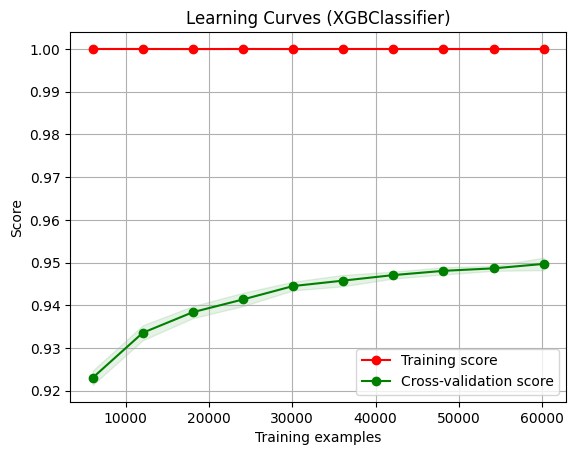

In [ ]:
# plot learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=42
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (XGBClassifier)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## **AdaBoost Regressor**

**What is Adaboost?**

Adaboost (short for Adaptive Boosting) is a type of boosting algorithm that combines multiple weak classifiers to create a stronger classifier. A weak classifier is a classifier that performs only slightly better than random guessing.

**How does Adaboost work?**

Adaboost works by training multiple weak classifiers on different subsets of the training data, and then combining their predictions to make a final prediction. The algorithm works as follows:

Assign equal weights to all the training examples.
Train a weak classifier on a subset of the training data.
Increase the weights of the misclassified examples.
Train another weak classifier on the same subset of data but with the weights adjusted to give more importance to the misclassified examples.
Repeat steps 3-4 for a specified number of iterations or until the error rate is sufficiently low.
Combine the predictions of all the weak classifiers to make a final prediction.
The key idea behind Adaboost is that by giving more weight to the misclassified examples, the algorithm can focus on the examples that are more difficult to classify and improve its overall accuracy.


The Adaboost algorithm involves computing the weighted error rate of each weak classifier and using it to update the weights of the training examples. The equation for computing the weighted error rate is:

$$\large \epsilon_t = \frac{\sum_{i=1}^{N} w_{t,i} \cdot \mathrm{I\!I}(y_i \neq h_t(x_i))}{\sum_{i=1}^{N} w_{t,i}}$$

Here, $w_i$ is the weight of the $i_{th}$ training example, $y_i$ is the true label of the $i_{th}$ example, $h(x_i)$ is the prediction of the weak classifier for the $i_{th}$ example, and the sum is over all the training examples.

The weight of the weak classifier is then computed as:

$$\large \alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$$

where $\alpha_t$ is the weight of the $t_{th}$ weak learner in the final model, and $\epsilon_t$ is the weighted error of the $t_{th}$ weak learner.

Finally, the weights of the training examples are updated as follows:

$$\large w_i \gets w_i \exp(-\alpha y_i h(x_i))$$

Here, $exp()$ is the exponential function, $y_i$ is the true label of the $i_{th}$ example, $h(x_i)$ is the prediction of the weak classifier for the $i_{th}$ example, and the sum is over all the training examples.

In [ ]:
# Instantiate a Decision Tree Classifier (base estimator)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)  # Using a shallow decision tree

# Instantiate the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the AdaBoost Classifier on the training data
adaboost_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = adaboost_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of AdaBoost Classifier: {accuracy:.4f}')

Accuracy of AdaBoost Classifier: 0.8935


## **Gradient Boosting Regressor**

**What is Gradient Boosting?**

Gradient Boosting is another boosting algorithm that combines multiple weak learners to create a strong learner. The difference between Adaboost and Gradient Boosting is that the former assigns different weights to different data points, while the latter fits the model to the residual errors of the previous model.

**How does Gradient Boosting work?**

Gradient Boosting works by sequentially adding weak learners to the model and updating the weights of the training examples based on the residual errors of the previous models. The algorithm works as follows:

Initialize the model with a constant value, such as the mean of the target variable.

For each weak learner:
- Train the weak learner on the training data.
- Compute the predictions of the weak learner.
- Compute the residual errors of the previous model by subtracting the predicted values from the actual values.
- Fit the weak learner to the residual errors.
- Update the weights of the training examples based on the fitted residual errors.
- Combine the predictions of all the weak learners to make a final prediction.

The key idea behind Gradient Boosting is that by fitting the model to the residual errors of the previous model, it can focus on the examples that were not well predicted by the previous model and improve its overall accuracy.


The Gradient Boosting algorithm involves computing the negative gradient of the loss function with respect to the predicted values and using it to update the model. The equation for computing the negative gradient is:

$$\large Negative\ Gradient = -\frac{\partial L(y_\text{true}, y_\text{pred})}{\partial y_\text{pred}}$$

Here,
$y_true$ is the true label of the example,
$y_pred$ is the predicted value of the model, and
the partial derivatives are taken with respect to these variables.

The weight of the weak learner is then computed as:

$$\large \alpha = learning\ rate * negative\ gradient$$

Finally, the model is updated as:

$$\large model\ prediction = model\ prediction + alpha * weak\ learner\ prediction$$

Here, learning_rate is a hyperparameter that controls the step size of each update, weak learner prediction is the prediction of the weak learner for the example, and the sum is over all the weak learners.

In [ ]:
# Instantiate the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the Gradient Boosting Classifier on the training data
gb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = gb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Gradient Boosting Classifier: {accuracy:.4f}')

Accuracy of Gradient Boosting Classifier: 0.9194


## **XGBoost Regressor**

**What is XGBoost?**

XGBoost (Extreme Gradient Boosting) is an advanced ensemble learning technique that combines the power of boosting with decision trees to achieve high predictive accuracy. It is renowned for its performance and efficiency in handling large datasets and complex problems.

**How does XGBoost work?**

XGBoost works by sequentially building decision trees, where each new tree corrects the errors of the previous ones. This process is based on gradient boosting, which optimizes the model by minimizing a loss function through gradient descent. Here’s a brief overview:

1. **Initial Model**: Start with a base model that makes initial predictions.
2. **Sequential Learning**: Train new trees to predict the residual errors (i.e., the difference between actual values and predictions) of the existing ensemble. Each new tree is added to correct the mistakes of the combined previous trees.
3. **Gradient Descent**: Use gradient descent to optimize the loss function and update the model parameters iteratively.

**Key Benefits**

- **High Accuracy**: XGBoost often provides higher accuracy than other algorithms due to its sophisticated boosting and regularization techniques.
- **Handles Missing Data**: It can handle missing values directly without the need for imputation.
- **Feature Importance**: XGBoost provides built-in feature importance scores, helping in feature selection and interpretation.
- **Efficiency**: It is optimized for speed and performance, making it suitable for large-scale data and complex models.

Overall, XGBoost enhances model performance by efficiently combining multiple decision trees, focusing on correcting errors from previous trees, and utilizing advanced optimization techniques.

**Regularization**: XGBoost includes L1 and L2 regularization to prevent overfitting.
**Tree Pruning**: XGBoost includes a technique called "tree pruning" to remove irrelevant features and reduce the complexity of the model.
Weighted Quantile Sketch: XGBoost uses a weighted quantile sketch algorithm to speed up the computation of split points in the decision trees.
Equations

The XGBoost algorithm involves computing the negative gradient of the loss function with respect to the predicted values and using it to update the model. The equation for computing the negative gradient is the same as in Gradient Boosting.

The weight of the weak learner is then computed as:

$$\large \alpha = learning\ rate * negative\ gradient + 0.5 * (L_1\ regularization + L_2\ regularization)$$

Finally, the model is updated.

In [ ]:
# Installing the xgboost library using the 'pip' command
!pip install xgboost

In [ ]:
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 9,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9546


In [ ]:
# Deafault

params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 100,  # Number of boosting rounds or trees
    'learning_rate': 0.3,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 6,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}


In [ ]:
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9562


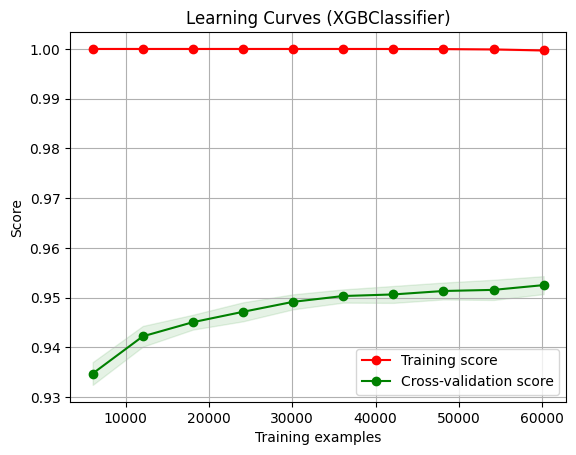

In [ ]:
# plot learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_classifier, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=42
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (XGBClassifier)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [ ]:
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 7,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9553


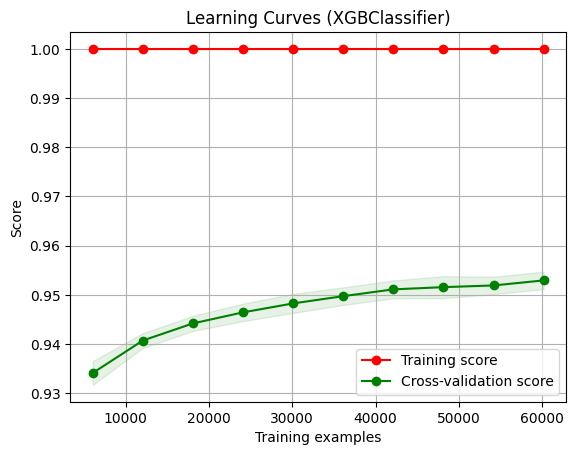

In [ ]:
# plot learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_classifier, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=42
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (XGBClassifier)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
# plot learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_classifier, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=42
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (XGBClassifier)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1,  # Verbosity of printing messages,
    'scale_pos_weight': 1,
    'learning_rate': 0.05
}

xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9563


In [ ]:
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 350,  # Number of boosting rounds or trees
    'max_depth': 35,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 0.9,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1,  # Verbosity of printing messages,
    'scale_pos_weight': 1,
    'learning_rate': 0.047
}

xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9559


In [ ]:
y_pred_prob = xgb_classifier.predict_proba(x_test)[:, 1]
best_threshold = 0.5
best_accuracy = 0.0
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred = np.where(y_pred_prob > threshold, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f'Best threshold: {best_threshold}')
print(f'Best accuracy: {best_accuracy:.4f}')

Best threshold: 0.5
Best accuracy: 0.9563


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, and y_test are already defined

# Calibrate the XGBClassifier using sigmoid method
cal_sigm = CalibratedClassifierCV(xgb_classifier, method='sigmoid', cv='prefit')
cal_sigm.fit(x_train, y_train)

# Predict probabilities and classes on the test data
p_pred = cal_sigm.predict_proba(x_test)
y_pred = cal_sigm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9544


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Print classification report for more detailed metrics
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[8185  344]
 [ 478 9804]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8529
           1       0.97      0.95      0.96     10282

    accuracy                           0.96     18811
   macro avg       0.96      0.96      0.96     18811
weighted avg       0.96      0.96      0.96     18811



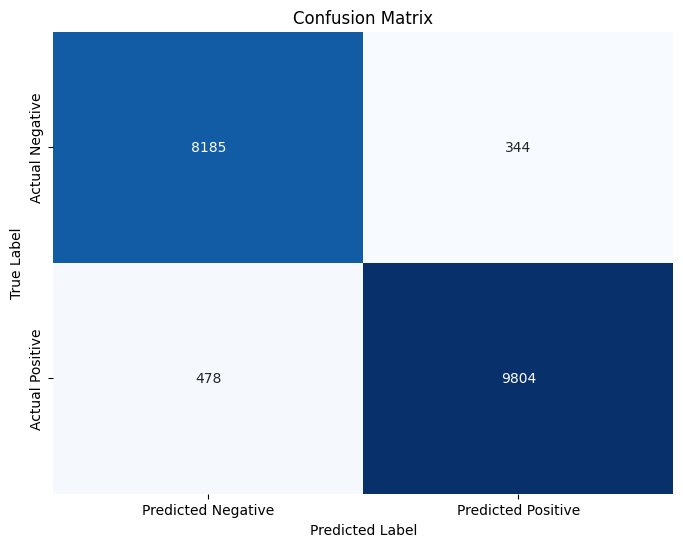

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
xgb_classifier.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test)],
    eval_metric='logloss',
    early_stopping_rounds=15,
    verbose=3
)

[0]	validation_0-logloss:0.65183
[3]	validation_0-logloss:0.56039
[6]	validation_0-logloss:0.49016
[9]	validation_0-logloss:0.43439
[12]	validation_0-logloss:0.38889
[15]	validation_0-logloss:0.35243
[18]	validation_0-logloss:0.32272
[21]	validation_0-logloss:0.29774
[24]	validation_0-logloss:0.27578
[27]	validation_0-logloss:0.25724
[30]	validation_0-logloss:0.24131
[33]	validation_0-logloss:0.22795
[36]	validation_0-logloss:0.21664
[39]	validation_0-logloss:0.20611
[42]	validation_0-logloss:0.19720
[45]	validation_0-logloss:0.18991
[48]	validation_0-logloss:0.18354
[51]	validation_0-logloss:0.17777
[54]	validation_0-logloss:0.17260
[57]	validation_0-logloss:0.16799
[60]	validation_0-logloss:0.16382
[63]	validation_0-logloss:0.16023
[66]	validation_0-logloss:0.15697
[69]	validation_0-logloss:0.15414
[72]	validation_0-logloss:0.15158
[75]	validation_0-logloss:0.14925
[78]	validation_0-logloss:0.14707
[81]	validation_0-logloss:0.14516
[84]	validation_0-logloss:0.14373
[87]	validation_0-

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9535


### Adjusted LR Sched

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost.callback import TrainingCallback

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

# Custom learning rate schedule callback with early stopping
class LearningRateScheduler(TrainingCallback):
    def __init__(self, alpha=0.075, beta=0.95, change_rounds=250):
        self.alpha = alpha
        self.beta = beta
        self.change_rounds = change_rounds
        self.best_metric = None
        self.best_iter = None

    def after_iteration(self, model, epoch, evals_log):
        new_lr = self.alpha * (self.beta ** (epoch // self.change_rounds))
        model.set_param('learning_rate', new_lr)

# Instantiate the XGBClassifier with initial params
xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier with learning rate schedule callback and early stopping
xgb_classifier.fit(x_train, y_train, eval_set=[(x_test, y_test)], callbacks=[LearningRateScheduler()])

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


[0]	validation_0-logloss:0.63056
[1]	validation_0-logloss:0.58409
[2]	validation_0-logloss:0.54358
[3]	validation_0-logloss:0.50802
[4]	validation_0-logloss:0.47667
[5]	validation_0-logloss:0.44848
[6]	validation_0-logloss:0.42322
[7]	validation_0-logloss:0.40021
[8]	validation_0-logloss:0.37972
[9]	validation_0-logloss:0.36122
[10]	validation_0-logloss:0.34477
[11]	validation_0-logloss:0.32960
[12]	validation_0-logloss:0.31574
[13]	validation_0-logloss:0.30348
[14]	validation_0-logloss:0.29182
[15]	validation_0-logloss:0.28078
[16]	validation_0-logloss:0.27094
[17]	validation_0-logloss:0.26173
[18]	validation_0-logloss:0.25304
[19]	validation_0-logloss:0.24512
[20]	validation_0-logloss:0.23772
[21]	validation_0-logloss:0.23104
[22]	validation_0-logloss:0.22469
[23]	validation_0-logloss:0.21905
[24]	validation_0-logloss:0.21342
[25]	validation_0-logloss:0.20829
[26]	validation_0-logloss:0.20345
[27]	validation_0-logloss:0.19918
[28]	validation_0-logloss:0.19512
[29]	validation_0-loglos

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost.callback import TrainingCallback

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

# Custom learning rate schedule callback with early stopping
class LearningRateScheduler(TrainingCallback):
    # def __init__(self, alpha=0.08, beta=0.9, change_rounds=100):
    # def __init__(self, alpha=0.08, beta=0.95, change_rounds=200): 0.9560
    def __init__(self, alpha=0.085, beta=0.95, change_rounds=300): #0.9566
        self.alpha = alpha
        self.beta = beta
        self.change_rounds = change_rounds
        self.best_metric = None
        self.best_iter = None

    def after_iteration(self, model, epoch, evals_log):
        new_lr = self.alpha * (self.beta ** (epoch // self.change_rounds))
        model.set_param('learning_rate', new_lr)

# Instantiate the XGBClassifier with initial params
xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier with learning rate schedule callback and early stopping
xgb_classifier.fit(x_train, y_train, eval_set=[(x_test, y_test)], callbacks=[LearningRateScheduler()])

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


[0]	validation_0-logloss:0.63056
[1]	validation_0-logloss:0.57816
[2]	validation_0-logloss:0.53327
[3]	validation_0-logloss:0.49463
[4]	validation_0-logloss:0.46061
[5]	validation_0-logloss:0.43048
[6]	validation_0-logloss:0.40381
[7]	validation_0-logloss:0.38075
[8]	validation_0-logloss:0.36018
[9]	validation_0-logloss:0.34166
[10]	validation_0-logloss:0.32491
[11]	validation_0-logloss:0.30944
[12]	validation_0-logloss:0.29602
[13]	validation_0-logloss:0.28338
[14]	validation_0-logloss:0.27164
[15]	validation_0-logloss:0.26139
[16]	validation_0-logloss:0.25172
[17]	validation_0-logloss:0.24280
[18]	validation_0-logloss:0.23471
[19]	validation_0-logloss:0.22748
[20]	validation_0-logloss:0.22094
[21]	validation_0-logloss:0.21449
[22]	validation_0-logloss:0.20842
[23]	validation_0-logloss:0.20295
[24]	validation_0-logloss:0.19822
[25]	validation_0-logloss:0.19373
[26]	validation_0-logloss:0.18991
[27]	validation_0-logloss:0.18606
[28]	validation_0-logloss:0.18229
[29]	validation_0-loglos

In [ ]:
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 350,  # Number of boosting rounds or trees
    'max_depth': 35,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 0.9,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1,  # Verbosity of printing messages,
    'scale_pos_weight': 1,
    'learning_rate': 0.047
}

xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Custom learning rate schedule callback
class LearningRateScheduler(TrainingCallback):
    def __init__(self, alpha=0.3, beta=0.9, change_rounds=100):
        self.alpha = alpha
        self.beta = beta
        self.change_rounds = change_rounds

    def after_iteration(self, model, epoch, evals_log):
        new_lr = self.alpha * (self.beta ** (epoch // self.change_rounds))
        model.set_param('learning_rate', new_lr)
        return False  # Return False to indicate no early stopping

# Instantiate the XGBClassifier with initial params
xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier with learning rate schedule callback
xgb_classifier.fit(x_train, y_train, eval_set=[(x_test, y_test)], callbacks=[LearningRateScheduler()])

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9559
[0]	validation_0-logloss:0.65100
[1]	validation_0-logloss:0.45988
[2]	validation_0-logloss:0.35221
[3]	validation_0-logloss:0.28310
[4]	validation_0-logloss:0.23641
[5]	validation_0-logloss:0.20412
[6]	validation_0-logloss:0.18142
[7]	validation_0-logloss:0.16470
[8]	validation_0-logloss:0.15279
[9]	validation_0-logloss:0.14399
[10]	validation_0-logloss:0.13843
[11]	validation_0-logloss:0.13318
[12]	validation_0-logloss:0.12987
[13]	validation_0-logloss:0.12672
[14]	validation_0-logloss:0.12503
[15]	validation_0-logloss:0.12333
[16]	validation_0-logloss:0.12236
[17]	validation_0-logloss:0.12147
[18]	validation_0-logloss:0.12089
[19]	validation_0-logloss:0.11995
[20]	validation_0-logloss:0.11966
[21]	validation_0-logloss:0.11952
[22]	validation_0-logloss:0.11957
[23]	validation_0-logloss:0.11891
[24]	validation_0-logloss:0.11897
[25]	validation_0-logloss:0.11892
[26]	validation_0-logloss:0.11848
[27]	validation_0-logloss:0.11840
[28]	validation_0-logloss:0.11865
[29]	va

## **Ensamble**

**What is Ensemble Learning?**

Ensemble learning is a technique in machine learning that **combines the predictions of multiple models** to improve overall performance. The idea is to leverage the strengths of various models to create a more robust and accurate prediction compared to any single model.

**How does Ensemble Learning work?**

Ensemble learning **involves training multiple models (or "learners")** and then aggregating their predictions to form a final result. This can be done in several ways:

- **Voting**: For classification tasks, the final prediction is made by taking a majority vote from all models.
- **Averaging**: For regression tasks, the final prediction is the average of predictions from all models.
- **Stacking**: Combines the predictions of multiple models using another model (called a meta-learner) to make the final prediction.

**Key Benefits**

- **Improved Accuracy**: By combining multiple models, ensemble methods often achieve better performance than any individual model.
- **Reduced Overfitting**: Ensembles can reduce the risk of overfitting by averaging out the errors of individual models.
- **Robustness**: They tend to be more robust and less sensitive to noisy data or outliers.

In summary, ensemble learning enhances predictive accuracy and model robustness by integrating the strengths of multiple models, making it a powerful approach in machine learning.

In [ ]:
params = {
    'n_estimators': 200,  # Number of trees in the forest
    'criterion': 'gini',  # Split criterion ('gini' or 'entropy')
    'max_depth': None,  # Maximum depth of the trees (None means unlimited)
    'min_samples_split': 2,  # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,  # Minimum number of samples required to be at a leaf node
    'min_weight_fraction_leaf': 0.0,  # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    'max_features': 0.6,  # Number of features to consider when looking for the best split
    'max_leaf_nodes': None,  # Maximum number of leaf nodes in each tree (None means unlimited)
    'min_impurity_decrease': 0.0,  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    'bootstrap': True,  # Whether bootstrap samples are used when building trees
    'oob_score': False,  # Whether to use out-of-bag samples to estimate the generalization accuracy
    'n_jobs': None,  # Number of jobs to run in parallel for both fit and predict (-1 means using all processors)
    'random_state': None,  # Random seed for reproducibility
    'verbose': 0,  # Controls verbosity of the tree building process
    'warm_start': False,  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    'class_weight': None  # Weights associated with classes in the form {class_label: weight}
}

# 'n_estimators': 100, 0.9516
# 'n_estimators': 200. 0.9524

rf_classifier = RandomForestClassifier(**params)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.4f}')

Accuracy of Random Forest Classifier: 0.9524


In [ ]:
params = {
    'n_estimators': 200,  # Number of trees in the forest
    'criterion': 'gini',  # Split criterion ('gini' or 'entropy')
    'max_depth': None,  # Maximum depth of the trees (None means unlimited)
    'min_samples_split': 2,  # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,  # Minimum number of samples required to be at a leaf node
    'min_weight_fraction_leaf': 0.0,  # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    'max_features': 0.6,  # Number of features to consider when looking for the best split
    'max_leaf_nodes': None,  # Maximum number of leaf nodes in each tree (None means unlimited)
    'min_impurity_decrease': 0.0,  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    'bootstrap': True,  # Whether bootstrap samples are used when building trees
    'oob_score': False,  # Whether to use out-of-bag samples to estimate the generalization accuracy
    'n_jobs': None,  # Number of jobs to run in parallel for both fit and predict (-1 means using all processors)
    'random_state': None,  # Random seed for reproducibility
    'verbose': 0,  # Controls verbosity of the tree building process
    'warm_start': False,  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    'class_weight': None  # Weights associated with classes in the form {class_label: weight}
}

# 'n_estimators': 100, 0.9516
# 'n_estimators': 200. 0.9524

rf_classifier = RandomForestClassifier(**params)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.4f}')

Accuracy of Random Forest Classifier: 0.9524


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import xgboost as xgb

rf_classifier = RandomForestClassifier(random_state=42)

# Meta-classifier
meta_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train base classifiers
# xgb_classifier.fit(x_train, y_train)
# rf_classifier.fit(x_train, y_train)
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

base_estimator = xgb.XGBClassifier(**params)

# Instantiate the Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=20, random_state=42)

# Fit the Bagging Classifier on the training data
bagging_classifier.fit(x_train, y_train)


# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=0.5, random_state=42)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

xgb_classifier = xgb.XGBClassifier(**params)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(x_test)


# Generate predictions from base classifiers (out-of-fold predictions)
xgb_pred = cross_val_predict(xgb_classifier, x_train, y_train, cv=5, method='predict_proba')[:, 1]
rf_pred = cross_val_predict(rf_classifier, x_train, y_train, cv=5, method='predict_proba')[:, 1]
bg_pred = cross_val_predict(bagging_classifier, x_train, y_train, cv=5, method='predict_proba')[:, 1]

# Create new features using predictions from base classifiers
meta_features = np.column_stack((xgb_pred, rf_pred, bg_pred))

# Train meta-classifier on the new features
meta_classifier.fit(meta_features, y_train)

# Generate predictions on test data using base classifiers
xgb_test_pred = xgb_classifier.predict_proba(x_test)[:, 1]
rf_test_pred = rf_classifier.predict_proba(x_test)[:, 1]
bagging_test_pred = rf_classifier.predict_proba(x_test)[:, 1]

# Create new features for test data using base classifiers
meta_test_features = np.column_stack((xgb_test_pred, rf_test_pred,bagging_test_pred))

# Make final predictions using meta-classifier
final_predictions = meta_classifier.predict(meta_test_features)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)

# Print ensemble accuracy
print(f'Ensemble Accuracy: {ensemble_accuracy:.4f}')

Ensemble Accuracy: 0.8300


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Base classifiers
params = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

xgb_classifier = xgb.XGBClassifier(**params)

rf_classifier = RandomForestClassifier(random_state=42)

# Meta-classifier
meta_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train base classifiers
xgb_classifier.fit(x_train, y_train)
rf_classifier.fit(x_train, y_train)

# Generate predictions from base classifiers (out-of-fold predictions)
xgb_pred = cross_val_predict(xgb_classifier, x_train, y_train, cv=5, method='predict_proba')[:, 1]
rf_pred = cross_val_predict(rf_classifier, x_train, y_train, cv=5, method='predict_proba')[:, 1]

# Create new features using predictions from base classifiers
meta_features = np.column_stack((xgb_pred, rf_pred))

# Train meta-classifier on the new features
meta_classifier.fit(meta_features, y_train)

# Generate predictions on test data using base classifiers
xgb_test_pred = xgb_classifier.predict_proba(x_test)[:, 1]
rf_test_pred = rf_classifier.predict_proba(x_test)[:, 1]

# Create new features for test data using base classifiers
meta_test_features = np.column_stack((xgb_test_pred, rf_test_pred))

# Make final predictions using meta-classifier
final_predictions = meta_classifier.predict(meta_test_features)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)

# Print ensemble accuracy
print(f'Ensemble Accuracy: {ensemble_accuracy:.4f}')


Ensemble Accuracy: 0.9562


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Base classifiers
params_xgb = {
    'objective': 'binary:logistic',  # Default objective for binary classification
    'booster': 'gbtree',  # Default booster type
    'n_estimators': 600,  # Number of boosting rounds or trees
    'learning_rate': 0.08,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 8,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'random_state': 0,  # Random number seed
    'verbosity': 1  # Verbosity of printing messages
}

params_rf = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}

xgb_classifier = xgb.XGBClassifier(**params_xgb)
rf_classifier = RandomForestClassifier(**params_rf)

# Meta-classifiers
meta_classifier_level2 = RandomForestClassifier(random_state=42)

# Train base classifiers
xgb_classifier.fit(x_train, y_train)
rf_classifier.fit(x_train, y_train)

# Generate predictions from base classifiers (out-of-fold predictions for stacking)
xgb_pred = cross_val_predict(xgb_classifier, x_train, y_train, cv=5, method='predict_proba')[:, 1]
rf_pred = cross_val_predict(rf_classifier, x_train, y_train, cv=5, method='predict_proba')[:, 1]

# Train level 2 meta-classifier using predictions from base classifiers
meta_features_level2 = np.column_stack((xgb_pred, rf_pred))

# Train level 2 meta-classifier
meta_classifier_level2.fit(meta_features_level2, y_train)

# Generate predictions on test data using base classifiers
xgb_test_pred = xgb_classifier.predict_proba(x_test)[:, 1]
rf_test_pred = rf_classifier.predict_proba(x_test)[:, 1]

# Create new features for test data using base classifiers
meta_test_features_level2 = np.column_stack((xgb_test_pred, rf_test_pred))

# Make predictions using level 2 meta-classifier
meta_pred_level2 = meta_classifier_level2.predict(meta_test_features_level2)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, meta_pred_level2)

# Print ensemble accuracy
print(f'Ensemble Accuracy with Stacking (Level 2): {ensemble_accuracy:.4f}')


Ensemble Accuracy with Stacking (Level 2): 0.9406


## **Cataboost**

**What is CatBoost?**

CatBoost (Categorical Boosting) is an advanced gradient boosting library designed to handle categorical features efficiently and to provide high-quality predictions. It is developed by **Yandex** and is known for its performance and ease of use in various machine learning tasks.

In summary, CatBoost is a powerful gradient boosting library that excels in handling categorical features, provides high performance and efficiency, and supports a wide range of machine learning tasks.

**Key Features**

1. **Handling Categorical Features**: CatBoost effectively deals with categorical features without the need for extensive preprocessing, such as one-hot encoding. It uses techniques like target encoding and ordered boosting to manage categorical data efficiently.

2. **Gradient Boosting Framework**: CatBoost is built on the gradient boosting framework, which involves training multiple decision trees sequentially, where each tree corrects the errors of the previous trees.

3. **Robust to Overfitting**: It includes built-in regularization methods to reduce overfitting and improve generalization.

4. **Efficient Training**: CatBoost is optimized for speed and can handle large datasets and high-dimensional features effectively. It provides high computational efficiency and scalability.

5. **Support for Various Objectives**: It supports a range of loss functions and objectives for classification, regression, ranking, and other machine learning tasks.

6. **Interpretable Models**: CatBoost offers tools for model interpretation, including feature importance scores and SHAP (SHapley Additive exPlanations) values.

**Benefits**

- **High Performance**: CatBoost often achieves competitive performance and accuracy compared to other boosting algorithms.
- **Ease of Use**: It simplifies the handling of categorical variables and reduces the need for extensive data preprocessing.
- **Robust and Efficient**: It is designed to be robust to noise and capable of handling large datasets efficiently.



In [61]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 14.0 MB/s eta 0:00:00


In [58]:
x_train.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Total_Delay,Average_Delay,Overall_Rating,Avg_Travel_Distance_by_Class,Interaction_Service_Ratings,WIFI_Ratings,Boarding_Rating,Has_Delay
86080,Female,Loyal Customer,-2.071577,Personal Travel,Eco,-0.329353,-0.405015,-0.166898,Good,Green Car,Acceptable,Good,Convenient,Good,Good,Good,Good,Acceptable,Good,Acceptable,Needs Improvement,Good,Good,-0.288924,-0.288924,Good,1816.293503,Acceptable,Good,Good,1
44475,Male,Disloyal Customer,-1.286593,Business Travel,Eco,-0.063701,-0.100750,-0.354123,Needs Improvement,Ordinary,Extremely Poor,Needs Improvement,Very Convenient,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Good,Good,Acceptable,Good,Acceptable,-0.230163,-0.230163,Acceptable,1816.293503,Acceptable,Acceptable,Acceptable,1
49113,Male,Loyal Customer,0.429884,Business Travel,Eco,0.619039,-0.181417,1.737337,Poor,Ordinary,Poor,Good,Inconvenient,Poor,Poor,Poor,Poor,Good,Needs Improvement,Acceptable,Good,Good,Poor,0.942757,0.942757,Poor,1816.293503,Good,Poor,Poor,1
56249,Male,Loyal Customer,0.453939,Business Travel,Business,-0.567412,0.274615,-0.276024,Good,Green Car,Good,Good,Convenient,Excellent,Excellent,Good,Good,Good,Good,Good,Excellent,Good,Good,-0.002486,-0.002486,Good,2157.266555,Excellent,Excellent,Good,1
68649,Male,Disloyal Customer,0.537895,Business Travel,Eco,0.199440,-0.361177,0.025157,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Manageable,Excellent,Needs Improvement,Excellent,Excellent,Poor,Poor,Good,Acceptable,Good,Excellent,-0.166646,-0.166646,Excellent,1816.293503,Acceptable,Excellent,Excellent,1


In [59]:
x_train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding', 'Total_Delay', 'Average_Delay', 'Overall_Rating',
       'Avg_Travel_Distance_by_Class', 'Interaction_Service_Ratings',
       'WIFI_Ratings', 'Boarding_Rating', 'Has_Delay'],
      dtype='object')

In [63]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score

In [64]:
from catboost import CatBoostClassifier

# Assuming x_train and x_test are DataFrames with categorical columns
cat_features = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding','Overall_Rating',
       'Interaction_Service_Ratings',
       'WIFI_Ratings', 'Boarding_Rating', 'Has_Delay']

# Convert categorical columns to categorical type if they are not already
for col in cat_features:
    x_train[col] = x_train[col].astype('category')
    x_test[col] = x_test[col].astype('category')

# Define CatBoost Classifier with categorical features specified
catboost_classifier = CatBoostClassifier(iterations=100, random_state=42, cat_features=cat_features)

# Fit the classifier on the training data
catboost_classifier.fit(x_train, y_train, eval_set=(x_test, y_test))

# Predict on the test data
y_pred = catboost_classifier.predict(x_test)

# Evaluate accuracy or other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Learning rate set to 0.25084
0:	learn: 0.5050560	test: 0.5043386	best: 0.5043386 (0)	total: 46ms	remaining: 4.56s
1:	learn: 0.4388063	test: 0.4387896	best: 0.4387896 (1)	total: 89.4ms	remaining: 4.38s
2:	learn: 0.3486602	test: 0.3468473	best: 0.3468473 (2)	total: 127ms	remaining: 4.1s
3:	learn: 0.2976352	test: 0.2958921	best: 0.2958921 (3)	total: 174ms	remaining: 4.18s
4:	learn: 0.2634720	test: 0.2616369	best: 0.2616369 (4)	total: 213ms	remaining: 4.04s
5:	learn: 0.2485674	test: 0.2468471	best: 0.2468471 (5)	total: 248ms	remaining: 3.89s
6:	learn: 0.2370558	test: 0.2355331	best: 0.2355331 (6)	total: 286ms	remaining: 3.8s
7:	learn: 0.2255438	test: 0.2243288	best: 0.2243288 (7)	total: 327ms	remaining: 3.77s
8:	learn: 0.2176285	test: 0.2169962	best: 0.2169962 (8)	total: 364ms	remaining: 3.68s
9:	learn: 0.2127054	test: 0.2122664	best: 0.2122664 (9)	total: 400ms	remaining: 3.6s
10:	learn: 0.2082865	test: 0.2082977	best: 0.2082977 (10)	total: 437ms	remaining: 3.54s
11:	learn: 0.2057573	test:

### Tuned 1

Here are default CatBoost hyperparameters
lets try to tune them

```
params = {
     'iterations': 100,
     'learning_rate': 0.03,
     'depth': 6,
     'l2_leaf_reg': 3,
     'border_count': 254,
     'thread_count': -1,
     'random_state': None,
     'verbose': False
 }
```

**iterations=300**

In [ ]:
from catboost import CatBoostClassifier

# Assuming x_train and x_test are DataFrames with categorical columns
cat_features = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding','Overall_Rating',
       'Interaction_Service_Ratings',
       'WIFI_Ratings', 'Boarding_Rating', 'Has_Delay']

# Convert categorical columns to categorical type if they are not already
for col in cat_features:
    x_train[col] = x_train[col].astype('category')
    x_test[col] = x_test[col].astype('category')

# iterations=300 0.96

# Define CatBoost Classifier with categorical features specified
catboost_classifier = CatBoostClassifier(iterations=300, random_state=42, cat_features=cat_features)

# Fit the classifier on the training data
catboost_classifier.fit(x_train, y_train, eval_set=(x_test, y_test))

# Predict on the test data
y_pred = catboost_classifier.predict(x_test)

# Evaluate accuracy or other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Learning rate set to 0.155543
0:	learn: 0.5462400	test: 0.5457475	best: 0.5457475 (0)	total: 80.5ms	remaining: 24.1s
1:	learn: 0.4314148	test: 0.4294495	best: 0.4294495 (1)	total: 162ms	remaining: 24.1s
2:	learn: 0.3585659	test: 0.3564628	best: 0.3564628 (2)	total: 245ms	remaining: 24.3s
3:	learn: 0.3207559	test: 0.3187047	best: 0.3187047 (3)	total: 308ms	remaining: 22.8s
4:	learn: 0.2949110	test: 0.2929004	best: 0.2929004 (4)	total: 379ms	remaining: 22.4s
5:	learn: 0.2581228	test: 0.2561296	best: 0.2561296 (5)	total: 466ms	remaining: 22.8s
6:	learn: 0.2306250	test: 0.2291384	best: 0.2291384 (6)	total: 558ms	remaining: 23.4s
7:	learn: 0.2180282	test: 0.2162099	best: 0.2162099 (7)	total: 654ms	remaining: 23.9s
8:	learn: 0.2069271	test: 0.2052576	best: 0.2052576 (8)	total: 747ms	remaining: 24.1s
9:	learn: 0.2010366	test: 0.1994998	best: 0.1994998 (9)	total: 829ms	remaining: 24s
10:	learn: 0.1910473	test: 0.1895505	best: 0.1895505 (10)	total: 910ms	remaining: 23.9s
11:	learn: 0.1882847	te

### Tuned 2

**depth = 10**

In [ ]:
from catboost import CatBoostClassifier

# Assuming x_train and x_test are DataFrames with categorical columns
cat_features = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding','Overall_Rating',
       'Interaction_Service_Ratings',
       'WIFI_Ratings', 'Boarding_Rating', 'Has_Delay']

# Convert categorical columns to categorical type if they are not already
for col in cat_features:
    x_train[col] = x_train[col].astype('category')
    x_test[col] = x_test[col].astype('category')

# iterations=300 0.96

# Define CatBoost Classifier with categorical features specified
catboost_classifier = CatBoostClassifier(iterations=300, depth = 10, random_state=42, cat_features=cat_features)

# Fit the classifier on the training data
catboost_classifier.fit(x_train, y_train, eval_set=(x_test, y_test))

# Predict on the test data
y_pred = catboost_classifier.predict(x_test)

# Evaluate accuracy or other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Learning rate set to 0.155543
0:	learn: 0.4657993	test: 0.4644779	best: 0.4644779 (0)	total: 191ms	remaining: 57.2s
1:	learn: 0.3216007	test: 0.3208041	best: 0.3208041 (1)	total: 419ms	remaining: 1m 2s
2:	learn: 0.2511742	test: 0.2507684	best: 0.2507684 (2)	total: 598ms	remaining: 59.2s
3:	learn: 0.2134007	test: 0.2125349	best: 0.2125349 (3)	total: 818ms	remaining: 1m
4:	learn: 0.1918405	test: 0.1920018	best: 0.1920018 (4)	total: 1.08s	remaining: 1m 3s
5:	learn: 0.1752740	test: 0.1759585	best: 0.1759585 (5)	total: 1.35s	remaining: 1m 6s
6:	learn: 0.1680203	test: 0.1692804	best: 0.1692804 (6)	total: 1.55s	remaining: 1m 4s
7:	learn: 0.1606018	test: 0.1628325	best: 0.1628325 (7)	total: 1.78s	remaining: 1m 4s
8:	learn: 0.1537604	test: 0.1569690	best: 0.1569690 (8)	total: 2.02s	remaining: 1m 5s
9:	learn: 0.1475481	test: 0.1510602	best: 0.1510602 (9)	total: 2.26s	remaining: 1m 5s
10:	learn: 0.1419160	test: 0.1462685	best: 0.1462685 (10)	total: 2.51s	remaining: 1m 5s
11:	learn: 0.1380726	test

### Tuned 3

**iterations=1000, learning_rate = 0.0295, depth = 9**

In [ ]:
from catboost import CatBoostClassifier

# Assuming x_train and x_test are DataFrames with categorical columns
cat_features = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding','Overall_Rating',
       'Interaction_Service_Ratings',
       'WIFI_Ratings', 'Boarding_Rating', 'Has_Delay']

# Convert categorical columns to categorical type if they are not already
for col in cat_features:
    x_train[col] = x_train[col].astype('category')
    x_test[col] = x_test[col].astype('category')

# iterations=300 0.96

# Define CatBoost Classifier with categorical features specified
catboost_classifier = CatBoostClassifier(iterations=1000, learning_rate = 0.0295, depth = 9, random_state=42, cat_features=cat_features)

# Fit the classifier on the training data
catboost_classifier.fit(x_train, y_train, eval_set=(x_test, y_test))

# Predict on the test data
y_pred = catboost_classifier.predict(x_test)

# Evaluate accuracy or other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

0:	learn: 0.6397024	test: 0.6392688	best: 0.6392688 (0)	total: 155ms	remaining: 2m 34s
1:	learn: 0.5924944	test: 0.5916723	best: 0.5916723 (1)	total: 309ms	remaining: 2m 34s
2:	learn: 0.5508612	test: 0.5497378	best: 0.5497378 (2)	total: 462ms	remaining: 2m 33s
3:	learn: 0.5142640	test: 0.5129011	best: 0.5129011 (3)	total: 574ms	remaining: 2m 22s
4:	learn: 0.4821461	test: 0.4805837	best: 0.4805837 (4)	total: 737ms	remaining: 2m 26s
5:	learn: 0.4539587	test: 0.4522460	best: 0.4522460 (5)	total: 858ms	remaining: 2m 22s
6:	learn: 0.4292436	test: 0.4274146	best: 0.4274146 (6)	total: 969ms	remaining: 2m 17s
7:	learn: 0.4074989	test: 0.4055731	best: 0.4055731 (7)	total: 1.12s	remaining: 2m 18s
8:	learn: 0.3899348	test: 0.3881808	best: 0.3881808 (8)	total: 1.26s	remaining: 2m 18s
9:	learn: 0.3663342	test: 0.3645483	best: 0.3645483 (9)	total: 1.43s	remaining: 2m 21s
10:	learn: 0.3451868	test: 0.3434436	best: 0.3434436 (10)	total: 1.59s	remaining: 2m 23s
11:	learn: 0.3269837	test: 0.3252220	best

### Callibration

Model calibration is the process of **adjusting the output probabilities of a predictive model to better reflect the true likelihood of outcomes**. This is especially important for probabilistic models where predicted probabilities may not accurately represent the true probabilities of an event occurring. Calibration techniques, such as Platt scaling or isotonic regression, modify the model's probability estimates based on the observed frequencies of outcomes in the training data, ensuring that the predicted probabilities align more closely with actual event rates. This enhances the reliability of the model's probability predictions and improves decision-making based on those predictions.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, and y_test are already defined

# Calibrate the XGBClassifier using sigmoid method
cal_sigm = CalibratedClassifierCV(catboost_classifier, method='sigmoid', cv='prefit')
cal_sigm.fit(x_train, y_train)

# Predict probabilities and classes on the test data
p_pred = cal_sigm.predict_proba(x_test)
y_pred = cal_sigm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9544


## Model comparision

In [67]:
import pandas as pd

# Define the model accuracy data
data = {
    'Model': [
        'Decision Tree',
        'Bagging Decision Tree Classifier',
        'Bagging XGBoost Classifier',
        'Bagging Random Forest Classifier',
        'AdaBoost',
        'Gradient Boosting',
        'XGBoost',
        'Ensemble',
        'CatBoost',
        'CatBoost Callibrated'
    ],
    'Accuracy': [
        0.93,
        0.9477,
        0.9523,
        0.9519,
        0.8935,
        0.9194,
        0.9544,
        0.9562,
        0.96,
        0.9544
    ]
}




In [69]:
# Create a DataFrame
accuracy_df = pd.DataFrame(data)

# Define a function to left-align text
def left_align(x):
    return 'text-align: left'

# Apply the styling
styled_df = accuracy_df.style.applymap(left_align, subset=['Model', 'Accuracy'])

# Display the styled DataFrame
styled_df

,Model,Accuracy
0,Decision Tree,0.930000
1,Bagging Decision Tree Classifier,0.947700
2,Bagging XGBoost Classifier,0.952300
3,Bagging Random Forest Classifier,0.951900
4,AdaBoost,0.893500
5,Gradient Boosting,0.919400
6,XGBoost,0.954400
7,Ensemble,0.956200
8,CatBoost,0.960000
9,CatBoost Callibrated,0.954400


We can see from the chart below that **CatBoost** **model 8** gave the best result